## PROJECT TITLE:  Traffic Violation Causes & Accident Analysis

**VENKATA YAGNESH SURIBHATLA**

**UIN - 01166231**

## **ABSTRACT**


**Data Set:** Traffic Violations in Montgomery County of Maryland(Traffic_violations.csv).
* This dataset contains traffic violation information from all electronic traffic violations issued in the County. Data sets on traffic violation presents an aggregated amount of data on all law eligible traffic stops in the state of Maryland. Basically, it consists of all traffic stops that occurred under Maryland jurisdiction for eight consecutive years/calendar years (2012-2020 latest month).

**URL:** https://catalog.data.gov/dataset/traffic-violations-56dda

**Introduction:** Violations in traffic laws are very common in a highly populated country like US. The accidents associated with these violations cause a huge loss to life and property. Being a metro city and a highly populated, has a lot of road accidents every year. Being a metro city and a highly populated state,Maryland has a lot of road accidents every year. Despite this the violations in traffic laws do not reduce. A lot of people disobey the rules every day sometimes willingly and sometimes because they are forced to do so because of others.

Traffic violations occur when drivers violate laws that regulate vehicle operation on streets and highways.  More than 90% of Americans over age 16 are licensed to drive, often with more than one vehicle registered per name. That translates into trillions of miles driven each year and millions of traffic infractions -- including speeding, running red lights, reckless driving etc. Traffic violations are usually issued by local law enforcement officers and processed in local branches of state court.

**Action Items**: Predicting a comprehensive understanding of the reasons of accidents so as to determine the underlying cause of the same. Since it is a real time raw data we would start with our **Data Exploratory process** like handling the NaN values, Dropping few features which doesn't contribute in predicting our target variable and other Transformations. Our target variable is the "Accidents" coloumn.

We explore the relationship of the other features in the dataset with respect to Accident. We will the visualize the relation of all the other depend features with respect to our target variable,and hence find the most correlated features which effects our target variable.we would then implement the data in various **Modelling** structures such as Logistic Regression, KNN classifier, Random Forest. These modeling will then give us the accuracy of our prediction and then we could state which model gives us the most optamized and accurate readings.

## **Aim**:
The goal is to increase the awareness among the people to follow safe driving practices and to decrease the number of
traffic accidents/violations in future by including these statistics in traffic manuals.

## Content: 
This data set contains all events of traffic violations from 2012 to 2020. It has about 1.04 million records. The data include items, such as:

1. **Date of Stop**: Date of the traffic violation
2. **Time of Stop**: Time of traffic violation
3. **Agency**: Agency issuing the traffic violation
4. **SubAgency**: Court code representing the district of assignment of the officer
5. **Description**: Text description of the specific charge
6. **Location**: Location of the violation, usually an address or intersection
7. **Latitude**: Latitude location of the traffic violation
8. **Longitude**: Longitude location of the traffic violation
9. **Accident**: If traffic violation involved an accident
10. **Belts**: If traffic violation involved a seat belt violation
11. **Personal Injury**: If traffic violation involved Personal Injury
12. **Property Damage**: If traffic violation involved Property Damage
13. **Fatal**: If traffic violation involved a fatality
14. **Commercial License**: If the vehicle committing the traffic violation used Commercial License
15. **HAZMAT**: If the traffic violation involved hazardous materials
16. **Commercial Vehicle**: If the vehicle committing the traffic violation is a commercial vehicle
17. **Alcohol**: If the traffic violation included an alcohol related
18. **Work Zone**: If the traffic violation was in a work zone
19. **State**: State issuing the vehicle registration
20. **VehicleType**: Type of vehicle (Examples: Automobile, Station Wagon, Heavy Duty Truck, etc.)
21. **Year**: Year vehicle was made
22. **Make**: Manufacturer of the vehicle (Examples: Ford, Chevy, Honda, Toyota, etc.)
23. **Model**: Model of the vehicle
24. **Color**: Color of the vehicle
25. **Violation Type**: Type of violation (Examples: Warning, Citation etc)
26. **Charge**: Numeric code for the specific charge
27. **Article**: Article of State Law
28. **Contributed To Accident**: If the traffic violation was a contributing factor in an accident
29. **Race**: Race of the driver
30. **Gender**: Gender of the driver
31. **Driver City**: City of the driver’s home address
32. **Driver State**: State of the driver’s home address
33. **DL State**: State issuing the Driver’s License
34. **Arrest Type**: Type of Arrest (A = Marked, B = Unmarked, etc.)
35. **Geolocation**: Geo-coded location information

### OBJECTIVES:

1. The main objective of the project is to analyze and extract essential information responsible for the accidents/violations made by the drivers. 
2. Is there a strong link between reckless drivers( under influence of alcohol, seat belt violation ) and road accidents.
3. Predict the likelihood of a driver causing road accident
4. Based on the description column details can we identify whether its a moving or a non moving traffic violation?

## **IMPLEMENTATION**

## **DATA COLLECTION & CLEANING**

In [732]:
#libraries
import numpy as np
import pandas as pd
import io
import seaborn as sns
from matplotlib import mlab
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from gc import collect
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_absolute_error

In [733]:
cd C:\Users\S V Yagnesh.000\Desktop\SuribhatlaV_DSP_FinalProject

C:\Users\S V Yagnesh.000\Desktop\SuribhatlaV_DSP_FinalProject


In [734]:
#Read the data from Local
df = pd.read_csv('Traffic_violations.csv', error_bad_lines = False, low_memory=False)

In [735]:
#view data
df.head()

,Seqid,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,...,Charge,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation
0,02ccadf1-7ebd-48d8-a793-913e3198f52a,07/30/2019,22:15:00,MCP,"2nd District, Bethesda",EXCEEDING THE POSTED SPEED LIMIT OF 35 MPH,RIVER RD/ROYAL DOMINION DR,38.990102,-77.151645,No,...,21-801.1,Transportation Article,False,ASIAN,F,FAIRFAX,VA,VA,Q - Marked Laser,"(38.9901016666667, -77.151645)"
1,3b060228-d664-4480-9314-6188ee8ac891,07-07-2019,22:54:00,MCP,"4th District, Wheaton",FAILURE TO STOP AT STOP SIGN,ENNALLS AVE @ GEORGIA AVE,39.040360,-77.051137,No,...,21-707(a),Transportation Article,False,HISPANIC,M,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.04036, -77.0511366666667)"
2,d4dd55c0-adb0-434e-b5d9-d8346b0a4080,07-10-2019,16:00:00,MCP,"1st District, Rockville",HEADLIGHT INOPERATIVE,SHADY GROVE @ TUPELO,0.000000,0.000000,No,...,11-393.9,Maryland Rules,False,HISPANIC,M,ALEXANDRIA,VA,VA,A - Marked Patrol,"(0.0, 0.0)"
3,abd509c6-edb3-4818-b90a-477cf92755e6,08/15/2019,22:42:00,MCP,"2nd District, Bethesda",DRIVING VEH. W/O ADEQUATE REAR REG. PLATE ILLU...,355 AT JONES BRIDGE RD,38.997645,-77.096600,No,...,22-204(f),Transportation Article,False,WHITE,F,POTOMAC,MD,MD,A - Marked Patrol,"(38.997645, -77.0966)"
4,021d5a2d-7989-4b52-a983-7f6e462fc123,04/15/2019,05:49:00,MCP,"5th District, Germantown",DRIVER CHANGING LANES WHEN UNSAFE,GERMANTOWN AT SHAKESPEARE RD,0.000000,0.000000,No,...,21-309(b),Transportation Article,False,BLACK,F,MONTGOMERY VILLAGE,MD,MD,A - Marked Patrol,"(0.0, 0.0)"


In [736]:
#No of rows , No of columns
print("dataset contains {} rows and {} columns ".format(df.shape[0], df.shape[1]))

dataset contains 1048575 rows and 43 columns 


In [737]:
#looking for null values
pd.isnull(df).sum()

Seqid                            0
Date Of Stop                     0
Time Of Stop                     0
Agency                           0
SubAgency                        0
Description                      5
Location                         1
Latitude                         0
Longitude                        0
Accident                         0
Belts                            0
Personal Injury                  0
Property Damage                  0
Fatal                            0
Commercial License               0
HAZMAT                           0
Commercial Vehicle               0
Alcohol                          0
Work Zone                        0
Search Conducted            627153
Search Disposition          993021
Search Outcome              644453
Search Reason               993021
Search Reason For Stop      627268
Search Type                 993028
Search Arrest Reason       1007732
State                           56
VehicleType                      0
Year                

In [738]:
df=df.drop(['Seqid','Agency','State','Color','Driver City','Search Reason','DL State','HAZMAT','Search Conducted','Charge','Article','Search Arrest Reason','Search Type','Search Reason For Stop','Arrest Type','Search Disposition','Search Outcome','Driver State'],axis=1)

**Comments**:
1. Since the data collected was Traffic Violations data set in Montgomery county, state MD. Few of the data coulmns like Agency, State, Driver City, Driver State, DL state etc., of which most data belongs to MD can be removed.
2. Also Search Reason, Search Conducted, Search Arrest Reason, Search Type, Search Reason For Stop, Search Disposition,
Search Outcome many of these column values are null also these are not required for study on accidents and violations.
3. Color, HAZMAT, Charge, Article, Arrest Type, Seqid are not required for study on accidents.(Also Color and Article has many null values)

In [739]:
df.Year.unique()

array([2.014e+03, 2.016e+03, 2.018e+03, 2.006e+03, 2.008e+03, 2.010e+03,
       2.011e+03, 2.002e+03, 2.017e+03, 1.999e+03, 1.998e+03, 2.004e+03,
       2.007e+03, 2.005e+03, 1.989e+03, 2.000e+03, 1.994e+03, 2.015e+03,
       1.995e+03, 2.009e+03, 2.001e+03, 2.012e+03, 1.997e+03, 1.996e+03,
       2.013e+03, 2.003e+03, 1.993e+03,       nan, 1.992e+03, 5.795e+03,
       2.019e+03, 0.000e+00, 1.991e+03, 1.990e+03, 2.020e+03, 1.987e+03,
       3.020e+03, 1.985e+03, 1.973e+03, 1.981e+03, 1.900e+03, 1.986e+03,
       1.909e+03, 2.202e+03, 6.722e+03, 1.972e+03, 1.988e+03, 2.051e+03,
       9.999e+03, 2.996e+03, 1.980e+03, 1.969e+03, 6.247e+03, 2.817e+03,
       1.977e+03, 1.012e+03, 1.983e+03, 2.103e+03, 7.226e+03, 3.013e+03,
       4.000e+00, 1.976e+03, 2.022e+03, 1.984e+03, 1.978e+03, 2.077e+03,
       1.111e+03, 1.965e+03, 6.633e+03, 2.914e+03, 2.201e+03, 2.993e+03,
       6.673e+03, 2.911e+03, 1.620e+02, 1.010e+03, 2.105e+03, 3.697e+03,
       2.108e+03, 1.975e+03, 2.627e+03, 5.015e+03, 

In [740]:
#dropping Year of vehicle registration column which has many junk values(5772,9035etc.,)
df=df.drop(['Year'],axis=1)

In [741]:
#Now dropping the null values
df.dropna(inplace=True)

In [742]:
#checking for null values
df.isnull().any()

Date Of Stop               False
Time Of Stop               False
SubAgency                  False
Description                False
Location                   False
Latitude                   False
Longitude                  False
Accident                   False
Belts                      False
Personal Injury            False
Property Damage            False
Fatal                      False
Commercial License         False
Commercial Vehicle         False
Alcohol                    False
Work Zone                  False
VehicleType                False
Make                       False
Model                      False
Violation Type             False
Contributed To Accident    False
Race                       False
Gender                     False
Geolocation                False
dtype: bool

In [743]:
#Renaming the column names by removing the spaces
df = df.rename(columns={'Date Of Stop': 'Date_Of_Stop'})
df = df.rename(columns={'Time Of Stop': 'Time_Of_Stop'})
df = df.rename(columns={'Personal Injury': 'Personal_Injury'})
df = df.rename(columns={'Property Damage': 'Property_Damage'})
df = df.rename(columns={'Commercial License': 'Commercial_License'})
df = df.rename(columns={'Commercial Vehicle': 'Commercial_Vehicle'})
df = df.rename(columns={'Work Zone': 'Work_Zone'})
df = df.rename(columns={'Vehicle Type': 'Vehicle_Type'})
df = df.rename(columns={'Violation Type': 'Violation_Type'})
df = df.rename(columns={'Contributed To Accident': 'Contributed_To_Accident'})


In [744]:
# New No of rows , No of columns
print("dataset contains {} rows and {} columns ".format(df.shape[0], df.shape[1]))

dataset contains 1048448 rows and 24 columns 


In [745]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048448 entries, 0 to 1048574
Data columns (total 24 columns):
Date_Of_Stop               1048448 non-null object
Time_Of_Stop               1048448 non-null object
SubAgency                  1048448 non-null object
Description                1048448 non-null object
Location                   1048448 non-null object
Latitude                   1048448 non-null float64
Longitude                  1048448 non-null float64
Accident                   1048448 non-null object
Belts                      1048448 non-null object
Personal_Injury            1048448 non-null object
Property_Damage            1048448 non-null object
Fatal                      1048448 non-null object
Commercial_License         1048448 non-null object
Commercial_Vehicle         1048448 non-null object
Alcohol                    1048448 non-null object
Work_Zone                  1048448 non-null object
VehicleType                1048448 non-null object
Make              

We could see most of the values are object datatypes, even data & time of stop. Also, columns Accident to Work zone all are boolean data(Yes, No).

# DATA PREPROCESSING

In [746]:
#Converting the values (Yes,No) to boolean data for stastical analysis
for column in df.drop(columns=['Date_Of_Stop','Time_Of_Stop','Longitude', 'Latitude','SubAgency','Description','Location', 'VehicleType', 'Make','Model','Violation_Type','Race','Gender','Geolocation','Contributed_To_Accident']).columns:
    df[column] = df[column].replace(['Yes', 'No'], [1, 0]).astype('int')
collect()

153

In [747]:
df.describe()

,Latitude,Longitude,Accident,Belts,Personal_Injury,Property_Damage,Fatal,Commercial_License,Commercial_Vehicle,Alcohol,Work_Zone
count,1.048448e+06,1.048448e+06,1.048448e+06,1.048448e+06,1.048448e+06,1.048448e+06,1.048448e+06,1.048448e+06,1.048448e+06,1.048448e+06,1.048448e+06
mean,3.593627e+01,-7.090316e+01,3.674288e-02,3.650825e-02,1.746391e-02,2.932239e-02,3.118896e-04,3.202925e-02,6.065155e-03,2.087848e-03,2.451242e-04
std,1.063578e+01,2.098485e+01,1.881299e-01,1.875511e-01,1.309921e-01,1.687087e-01,1.765765e-02,1.760778e-01,7.764261e-02,4.564527e-02,1.565453e-02
min,0.000000e+00,-9.461099e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.901448e+01,-7.718598e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.906296e+01,-7.708021e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,3.912885e+01,-7.702459e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,4.154316e+01,3.906443e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [748]:
#counter for violations
df['Violation'] = pd.Series(1, index=df.index)

In [749]:
#Converting date & time of stop to datetime data types to get the year,month,day & hour
from datetime import datetime
df['Date_Of_Stop'] = pd.to_datetime(df['Date_Of_Stop'], dayfirst=True)
df['Time_Of_Stop'] = pd.to_datetime(df['Time_Of_Stop'], format='%H:%M:%S')
df['year'], df['month'],df["day_of_week"] = df['Date_Of_Stop'].dt.year, df['Date_Of_Stop'].dt.month, df['Date_Of_Stop'].dt.dayofweek

In [750]:
df['day_code']=df['Date_Of_Stop'].dt.strftime('%A')
df['month_code']=df['Date_Of_Stop'].dt.strftime('%b')
df['hour'] = df['Time_Of_Stop'].dt.hour+1

In [751]:
#dropping of data in 2020 as we will be analysing for the whole year
mask = (df['Date_Of_Stop'] >= '2012-1-1') & (df['Date_Of_Stop'] < '2020-1-1')
df = df.loc[mask]

In [752]:
df.head()

,Date_Of_Stop,Time_Of_Stop,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,Personal_Injury,...,Race,Gender,Geolocation,Violation,year,month,day_of_week,day_code,month_code,hour
0,2019-07-30,1900-01-01 22:15:00,"2nd District, Bethesda",EXCEEDING THE POSTED SPEED LIMIT OF 35 MPH,RIVER RD/ROYAL DOMINION DR,38.990102,-77.151645,0,0,0,...,ASIAN,F,"(38.9901016666667, -77.151645)",1,2019,7,1,Tuesday,Jul,23
1,2019-07-07,1900-01-01 22:54:00,"4th District, Wheaton",FAILURE TO STOP AT STOP SIGN,ENNALLS AVE @ GEORGIA AVE,39.040360,-77.051137,0,0,0,...,HISPANIC,M,"(39.04036, -77.0511366666667)",1,2019,7,6,Sunday,Jul,23
2,2019-10-07,1900-01-01 16:00:00,"1st District, Rockville",HEADLIGHT INOPERATIVE,SHADY GROVE @ TUPELO,0.000000,0.000000,0,0,0,...,HISPANIC,M,"(0.0, 0.0)",1,2019,10,0,Monday,Oct,17
3,2019-08-15,1900-01-01 22:42:00,"2nd District, Bethesda",DRIVING VEH. W/O ADEQUATE REAR REG. PLATE ILLU...,355 AT JONES BRIDGE RD,38.997645,-77.096600,0,0,0,...,WHITE,F,"(38.997645, -77.0966)",1,2019,8,3,Thursday,Aug,23
4,2019-04-15,1900-01-01 05:49:00,"5th District, Germantown",DRIVER CHANGING LANES WHEN UNSAFE,GERMANTOWN AT SHAKESPEARE RD,0.000000,0.000000,0,0,0,...,BLACK,F,"(0.0, 0.0)",1,2019,4,0,Monday,Apr,6


In [753]:
df.describe()

,Latitude,Longitude,Accident,Belts,Personal_Injury,Property_Damage,Fatal,Commercial_License,Commercial_Vehicle,Alcohol,Work_Zone,Violation,year,month,day_of_week,hour
count,1.011721e+06,1.011721e+06,1.011721e+06,1.011721e+06,1.011721e+06,1.011721e+06,1.011721e+06,1.011721e+06,1.011721e+06,1.011721e+06,1.011721e+06,1011721.0,1.011721e+06,1.011721e+06,1.011721e+06,1.011721e+06
mean,3.588975e+01,-7.081117e+01,3.697067e-02,3.707149e-02,1.763826e-02,2.957139e-02,3.054202e-04,3.224209e-02,6.285330e-03,2.123115e-03,2.401848e-04,1.0,2.015264e+03,6.539573e+00,2.872988e+00,1.345715e+01
std,1.070719e+01,2.112570e+01,1.886899e-01,1.889371e-01,1.316327e-01,1.694018e-01,1.747361e-02,1.766425e-01,7.903057e-02,4.602835e-02,1.549604e-02,0.0,2.316171e+00,3.390797e+00,1.945651e+00,7.074496e+00
min,0.000000e+00,-9.461099e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0,2.012000e+03,1.000000e+00,0.000000e+00,1.000000e+00
25%,3.901422e+01,-7.718530e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0,2.013000e+03,4.000000e+00,1.000000e+00,9.000000e+00
50%,3.906290e+01,-7.707999e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0,2.015000e+03,7.000000e+00,3.000000e+00,1.400000e+01
75%,3.912853e+01,-7.702406e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0,2.017000e+03,9.000000e+00,4.000000e+00,2.000000e+01
max,4.154316e+01,3.906443e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.0,2.019000e+03,1.200000e+01,6.000000e+00,2.400000e+01


In [754]:
df.dtypes

Date_Of_Stop               datetime64[ns]
Time_Of_Stop               datetime64[ns]
SubAgency                          object
Description                        object
Location                           object
Latitude                          float64
Longitude                         float64
Accident                            int32
Belts                               int32
Personal_Injury                     int32
Property_Damage                     int32
Fatal                               int32
Commercial_License                  int32
Commercial_Vehicle                  int32
Alcohol                             int32
Work_Zone                           int32
VehicleType                        object
Make                               object
Model                              object
Violation_Type                     object
Contributed_To_Accident              bool
Race                               object
Gender                             object
Geolocation                       

In [755]:
#giving the range of values to Longitude & Latitude
df = df[(-79.4772089<=df['Longitude']) & (df['Longitude']<=-75.049228) & (37.912465<=df['Latitude']) & (df['Latitude']<=39.7210786)]

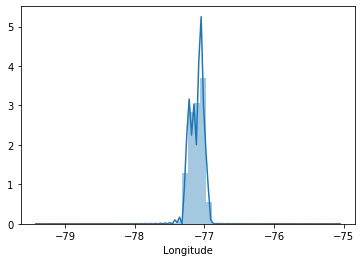

In [756]:
sns.distplot(df['Longitude'])

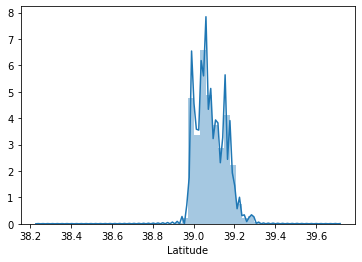

In [757]:
sns.distplot(df['Latitude'])

## **EXPLORATORY DATA ANALYSIS**

Text(0.5, 0.98, ' Correlations Heat Map for attributes')

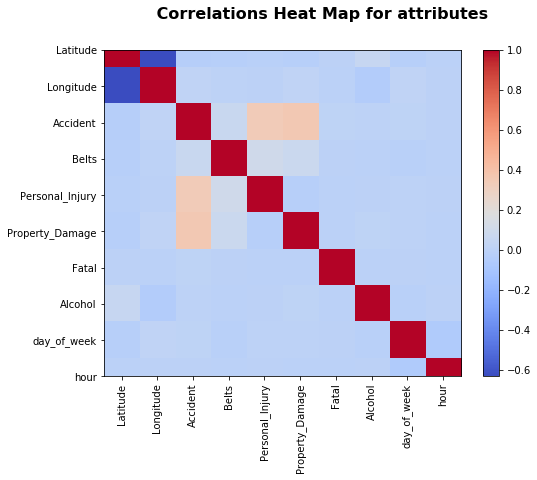

In [758]:
#correlation 
corltn=df.drop(columns=['Violation','Commercial_License','Commercial_Vehicle','Work_Zone','year','month','Contributed_To_Accident']).corr()
corltn=corltn.fillna(0)
plt.figure(figsize=(8, 6))
plt.imshow(corltn, cmap='coolwarm', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corltn)), corltn.columns, rotation='vertical')
plt.yticks(range(len(corltn)), corltn.columns);
plt.suptitle(' Correlations Heat Map for attributes', fontsize=16, fontweight='bold')

**Insight**: Correlations are weak. But Accidents are more correlted to Property Damage , next is personal injury. Also next Belts and Personal injury are more correlated at 3rd place.

In [759]:
#indexing by date of stop
df.index = pd.DatetimeIndex(df['Date_Of_Stop'])

In [760]:
#creating another dataset of violations which only included accidents
mask1 = (df['Accident'] == 1)
df1 = df.loc[mask1]

In [761]:
#Creating time series table for No of  traffic violation counts yearwise to study the pattern and trend  
vio_df1 = pd.DataFrame(zip(df['Violation'],df['month_code'],df['year']), columns=['violation','mon_code','year'])
table1 = pd.pivot_table(vio_df1, index = 'mon_code', values='violation', columns='year', aggfunc=np.sum)
table1

year,2012,2013,2014,2015,2016,2017,2018,2019
mon_code,,,,,,,,
Apr,11324,9415,10586,10708,10357,7313,8699,9503
Aug,12014,11185,10988,10917,9759,7471,8479,12515
Dec,10427,8345,8653,9327,8569,7567,7385,9464
Feb,9837,8453,8487,8109,9443,8196,7776,7363
Jan,9377,10194,9562,10573,8364,8911,9213,7393
Jul,12088,10207,10497,10639,10098,8377,8145,8644
Jun,12390,8917,9986,9506,9885,7177,7897,7852
Mar,11312,10396,11288,11604,10153,8000,8788,9512
May,14974,12946,12177,10361,10384,7941,7995,9887


In [762]:
#Creating time series table for No of  traffic accidents counts yearwise to study the pattern and trend 
acc_df1 = pd.DataFrame(zip(df1['Accident'],df1['month_code'],df1['year']), columns=['accident','mon_code','year'])
table1 = pd.pivot_table(acc_df1, index = 'year', values='accident', columns='mon_code', aggfunc=np.sum)
table1

mon_code,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
year,,,,,,,,,,,,
2012,198,235,345,159,181,242,370,257,288,240,291,237
2013,255,258,284,241,338,281,238,262,354,304,329,203
2014,257,331,390,264,264,298,335,328,369,383,362,244
2015,317,306,404,406,392,328,408,268,373,370,429,403
2016,350,432,413,316,351,465,350,477,458,405,535,517
2017,453,409,456,382,434,387,403,396,498,314,394,442
2018,319,316,329,393,348,330,413,323,334,412,407,360
2019,322,325,365,352,383,417,358,330,349,342,442,333


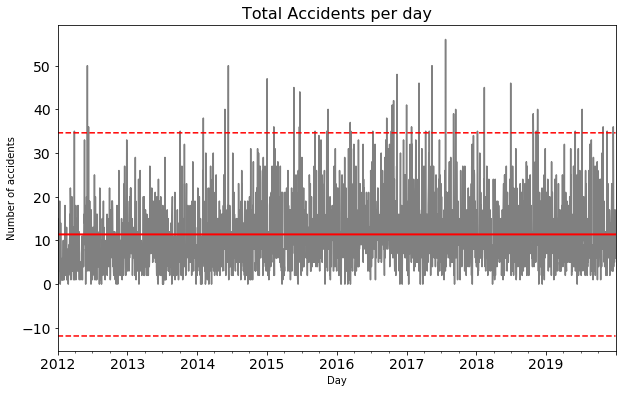

In [763]:
#plotting time series for total accident per day trend
accidents_per_day = pd.DataFrame(df1.resample('D').size())
accidents_per_day['mean'] = df1.resample('D').size().mean()
accidents_per_day['std'] = df1.resample('D').size().std()
# upper control limit and lower control limit
UCL = accidents_per_day['mean'] + 3 * accidents_per_day['std']
LCL = accidents_per_day['mean'] - 3 * accidents_per_day['std']
plt.figure(figsize=(10,6))
df1.resample('D').size().plot(label='Accidents per day', color='grey')
UCL.plot(color='red', ls='--', linewidth=1.5, label='UCL')
LCL.plot(color='red', ls='--', linewidth=1.5, label='LCL')
accidents_per_day['mean'].plot(color='red', linewidth=2, label='Average')
plt.title('Total Accidents per day', fontsize=16)
plt.xlabel('Day')
plt.ylabel('Number of accidents')
plt.tick_params(labelsize=14)

**Insight**: We can observe that the year 2017 has more number of acidents on many given day while from mid of 2012 and 2013 has lowest. Also we could see an upper limit of average of 35 accidents.

Text(0.5, 1.0, 'Total accidents per month')

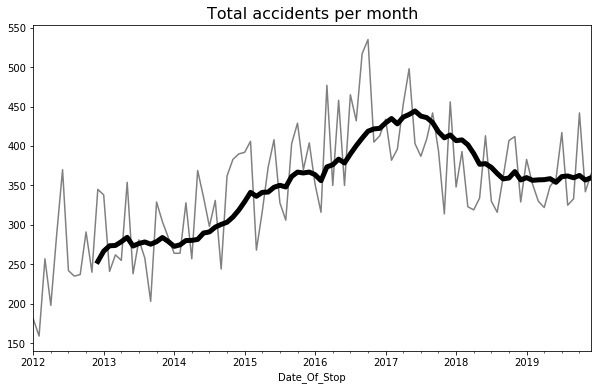

In [764]:
#plotting time series for total accident per month trend
month_df = df1.resample('M').size()
plt.figure(figsize=(10,6))
month_df.plot(label='Total,  accidents per month', color='grey')
month_df.rolling(window=12).mean().plot(color='black', linewidth=5, label='12-Months Average')
plt.title('Total accidents per month', fontsize=16)

In [765]:
print("Best Month {0}: {1}".format(month_df.idxmin(), month_df[month_df.idxmin()]))
print("Worst Month {0}: {1}".format(month_df.idxmax(), month_df[month_df.idxmax()]))

Best Month 2012-02-29 00:00:00: 159
Worst Month 2016-10-31 00:00:00: 535


**Insight**: There's a trend of increasing accidents per month. There was a steady increase from 2012 to 2017 in number of accidents per month. For almost all years we can see that there is a peak increase and a highest in mid of the year months and then a decrease per year.
Feburary 2012 had the least amount of accidents
October 2016 was the worst with 533 accidents

In [766]:
#accidents per week day
weekdays = ["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"]
week_df = pd.DataFrame(df1["day_of_week"].value_counts()).sort_index()
week_df["day"] = weekdays
week_df.columns = ["Accident counts", "Week day"]
week_df

,Accident counts,Week day
0,4657,Sun
1,4765,Mon
2,4786,Tue
3,4785,Wed
4,5051,Thu
5,4498,Fri
6,4716,Sat


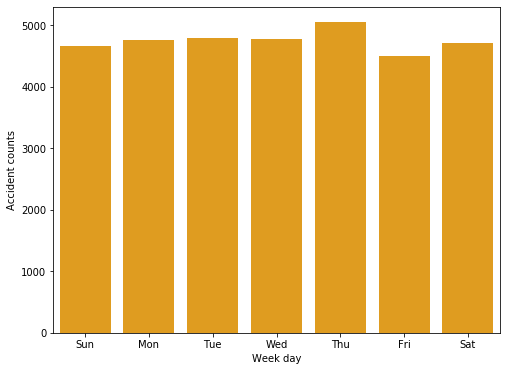

In [767]:
plt.figure(figsize=(8,6))
sns.barplot(x="Week day", y="Accident counts", color="orange", data=week_df)

**Insight**: The above pattern indicates that the traffic accidents peaks from Monday and mostly occur predominantly on Tuesday and Thursday while Friday has the least no of accidents.

In [768]:
hour = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24']
hour_df = pd.DataFrame(df1["hour"].value_counts()).sort_index()
hour_df["day"] = hour
hour_df.columns = ["Accident counts", "Hour"]
hour_df

,Accident counts,Hour
1,1152,1
2,990,2
3,930,3
4,1062,4
5,798,5
6,723,6
7,953,7
8,1381,8
9,1753,9
10,1495,10


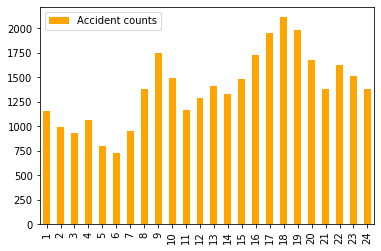

In [769]:
hour_df.plot(kind = 'bar', color = 'orange')

**Insight**: The traffic accidents  mainly peak at 9 AM in the Morning and from 6 PM in the evening.
This indicates that its mainly occuring in the office rush hours of the day.

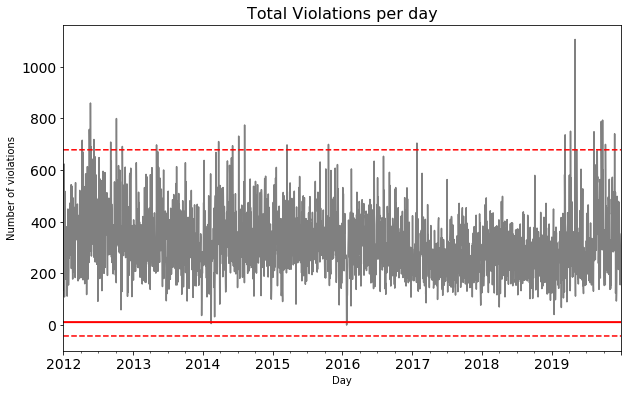

In [770]:
#plotting time series for total violation per day trend
violations_per_day = pd.DataFrame(df.resample('D').size())
violations_per_day['mean'] = df.resample('D').size().mean()
violations_per_day['std'] = df.resample('D').size().std()
# upper control limit and lower control limit
UCL = violations_per_day['mean'] + 3 * violations_per_day['std']
LCL = violations_per_day['mean'] - 3 * violations_per_day['std']
plt.figure(figsize=(10,6))
df.resample('D').size().plot(label='Violations per day', color='grey')
UCL.plot(color='red', ls='--', linewidth=1.5, label='UCL')
LCL.plot(color='red', ls='--', linewidth=1.5, label='LCL')
accidents_per_day['mean'].plot(color='red', linewidth=2, label='Average')
plt.title('Total Violations per day', fontsize=16)
plt.xlabel('Day')
plt.ylabel('Number of violations')
plt.tick_params(labelsize=14)

**Insight**: We can see that number of violations per day are more in the year 2019 and less in 2017 and 2018

Text(0.5, 1.0, 'Total Violations per month')

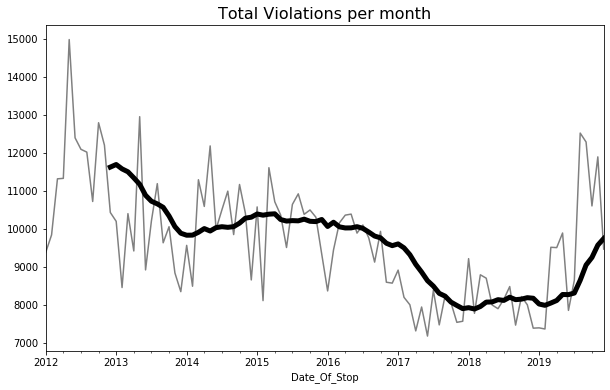

In [771]:
#plotting time series for total violation per month trend
month_df = df.resample('M').size()
plt.figure(figsize=(10,6))
month_df.plot(label='Total,  violations per month', color='grey')
month_df.rolling(window=12).mean().plot(color='black', linewidth=5, label='12-Months Average')
plt.title('Total Violations per month', fontsize=16)

In [772]:
print("Best Month {0}: {1}".format(month_df.idxmin(), month_df[month_df.idxmin()]))
print("Worst Month {0}: {1}".format(month_df.idxmax(), month_df[month_df.idxmax()]))

Best Month 2017-06-30 00:00:00: 7177
Worst Month 2012-05-31 00:00:00: 14974


**Insight**:The number of violations are highest in 2012 and the trend in violations over the years is decresing. There is a remarkable decrease in 2017, 2018 and 2013. Also violations follow a similar trend like accidents which is peak increase and a highest in mid of the year months and then a decrease per year. Now again the violation count is gradually increasing by 2019.
June 2017 had the least amount of violations
May 2012 was the worst with 14974 violations

In [773]:
#plotting time series for total violation per weekday trend
weekdays = ["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"]
week_df = pd.DataFrame(df["day_of_week"].value_counts()).sort_index()
week_df["day"] = weekdays
week_df.columns = ["Violation counts", "Week day"]
week_df

,Violation counts,Week day
0,131463,Sun
1,148156,Mon
2,143048,Tue
3,139387,Wed
4,141778,Thu
5,114100,Fri
6,111040,Sat


**Insight**:The below pattern indicates that the traffic violations have an upper trend on week days and it lowers during weekends. Monday registers the highest whereas Saturday registers the lowest number of traffic violations  

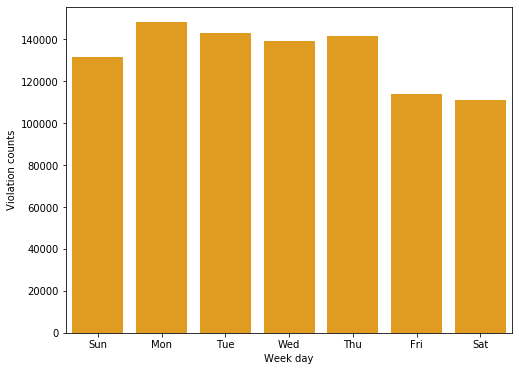

In [774]:
plt.figure(figsize=(8,6))
sns.barplot(x="Week day", y="Violation counts", color="orange", data=week_df)

In [775]:
hour = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24']
hour_df = pd.DataFrame(df["hour"].value_counts()).sort_index()
hour_df["day"] = hour
hour_df.columns = ["Violation counts", "Hour"]
hour_df

,Violation counts,Hour
1,47298,1
2,39849,2
3,32012,3
4,23058,4
5,14188,5
6,9751,6
7,15819,7
8,36793,8
9,54096,9
10,52016,10


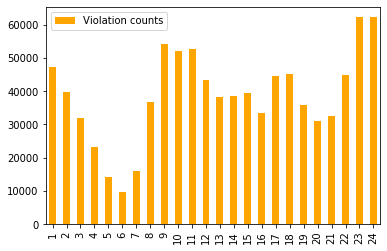

In [776]:
hour_df.plot(kind = 'bar', color = 'orange')

**Insight**: As per the box plot  the traffic violations starts to peak from 9 AM in th Morning. The maximum cases of  traffic violations occur from  night 10 PM to midnight.

Text(0.5, 0, 'Number of Cases')

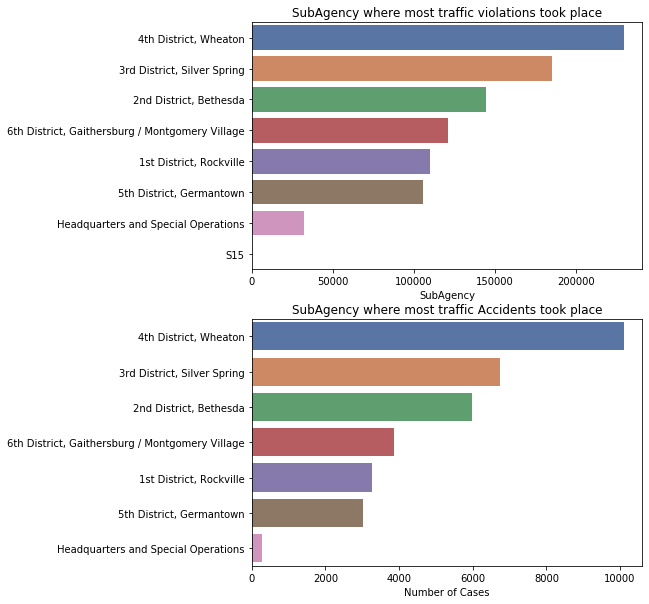

In [777]:
#SubAgency
plt.figure(figsize=(7,10))
plt.subplot(211)
chains=df['SubAgency'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("SubAgency where most traffic violations took place")

plt.subplot(212)
chains=df1['SubAgency'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("SubAgency where most traffic Accidents took place")
plt.xlabel("Number of Cases")

**Insights**: We see that most of the traffic violations and also violations that involved accidents took place in 4th District, Wheaton Subagency

Text(0.5, 0, 'count')

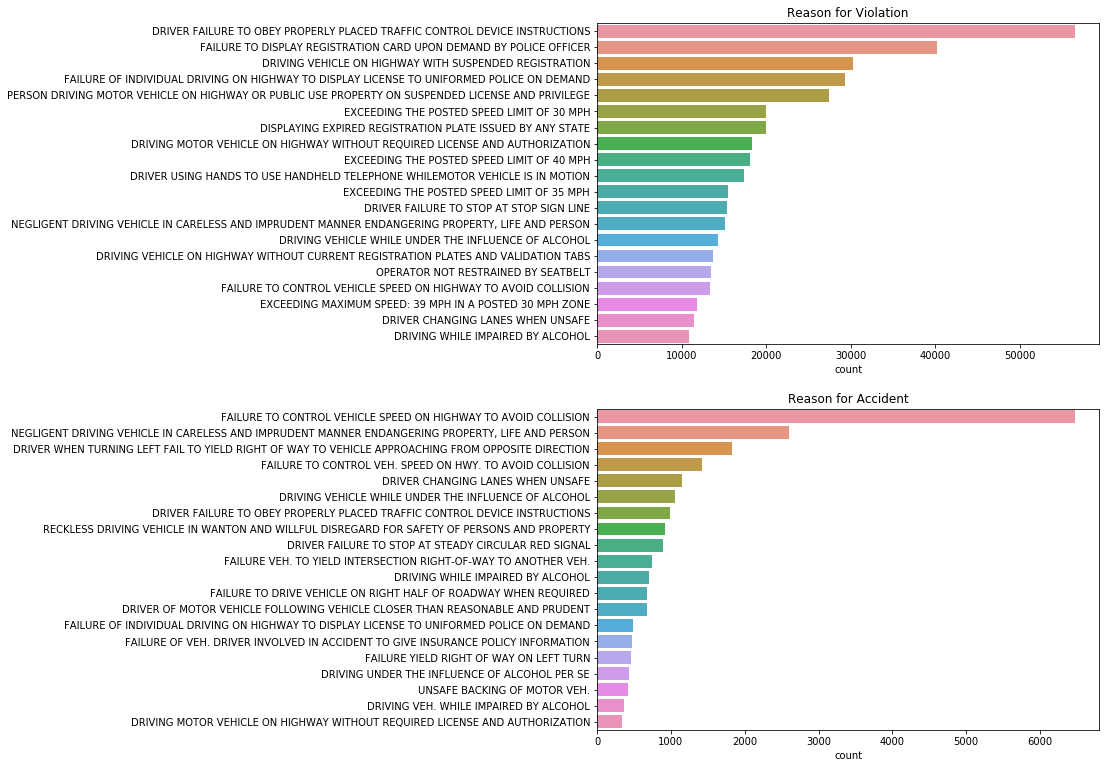

In [778]:
#Description
plt.figure(figsize=(9,13))
plt.subplot(211)
rest=df['Description'].value_counts()[:20]
sns.barplot(rest,rest.index)
plt.title("Reason for Violation")
plt.xlabel("count")

plt.subplot(212)
rest=df1['Description'].value_counts()[:20]
sns.barplot(rest,rest.index)
plt.title("Reason for Accident")
plt.xlabel("count")

**Insight**: We observe that the reason for most of the violations is due to disobedience of the driver like not following traffic instructions and having valid registration. And the reason for most of the accidents is due to high speed and negligent driving. I'll be discussing more in detail in the later of this notebook

Text(0.5, 0, 'Number of Cases')

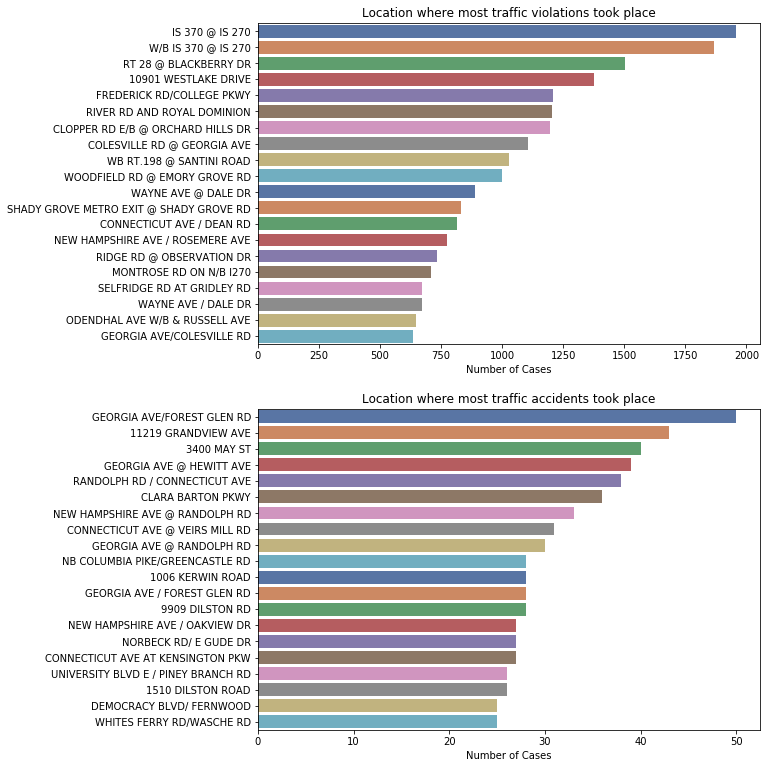

In [779]:
#Location
plt.figure(figsize=(9,13))
plt.subplot(211)
chains=df['Location'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("Location where most traffic violations took place")
plt.xlabel("Number of Cases")


plt.subplot(212)
chains=df1['Location'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("Location where most traffic accidents took place")
plt.xlabel("Number of Cases")

**Insight**: Most of the violations took place at IS 370 @IS 270 and the highest accidents hotspot is at GEORGIA AVE/FOREST GLEN RD

In [780]:
df.Accident.value_counts()

0    895714
1     33258
Name: Accident, dtype: int64

Text(0.5, 1.0, 'Traffic violations that are accidents')

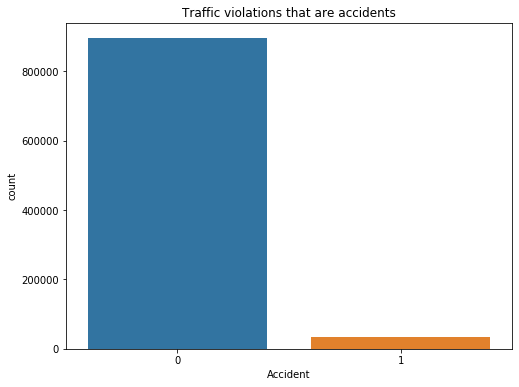

In [781]:
sns.countplot(df['Accident'])
fig = plt.gcf()
fig.set_size_inches(8,6)
plt.title('Traffic violations that are accidents')

**Insight**: Over 8 years from 2012-2019 out of the 1M traffiv violations around 33k accidents were recorded which is about 3.5%(quite less) but the alarming issue here is the reason for accident inspite of many safety precautions and signs.

Text(0.5, 1.0, 'Violations for Traffic accidents')

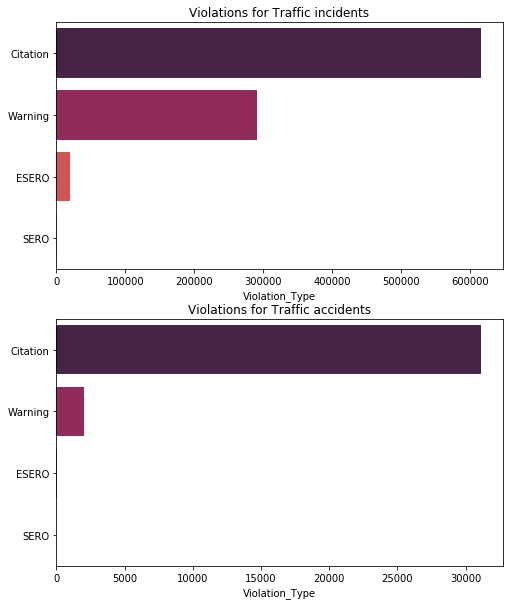

In [782]:
#Violation
plt.figure(figsize=(8,10))
plt.subplot(211)
Rest_locations=df['Violation_Type'].value_counts()[:20]
sns.barplot(Rest_locations,Rest_locations.index,palette="rocket")
plt.title("Violations for Traffic incidents")

plt.subplot(212)
Rest_locations=df1['Violation_Type'].value_counts()[:20]
sns.barplot(Rest_locations,Rest_locations.index,palette="rocket")
plt.title("Violations for Traffic accidents")

**Insight**: A majority of traffic violations have citations but also there are around 30% of incidents which are left with warnings, being spared the actual citations. This should be decreased and be taken care of by officials by implementating more rules. Obviously almost all accidents have citations and very few have warnings.

Text(0.5, 1.0, 'Type of the vehicle involved in Traffic accident')

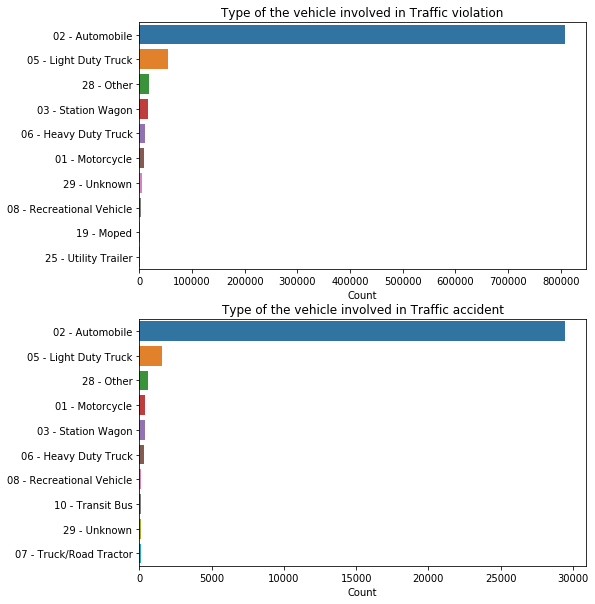

In [783]:
#Vehicle_Type
plt.figure(figsize=(8,10))
plt.subplot(211)
cuisines=df['VehicleType'].value_counts()[:10]
sns.barplot(cuisines,cuisines.index)
plt.xlabel('Count')
plt.title("Type of the vehicle involved in Traffic violation")

plt.subplot(212)
cuisines=df1['VehicleType'].value_counts()[:10]
sns.barplot(cuisines,cuisines.index)
plt.xlabel('Count')
plt.title("Type of the vehicle involved in Traffic accident")

**Insight**: Automobile is the major vehicle type involved in most of the traffic violation and accident both around 90%.

<Figure size 648x648 with 0 Axes>

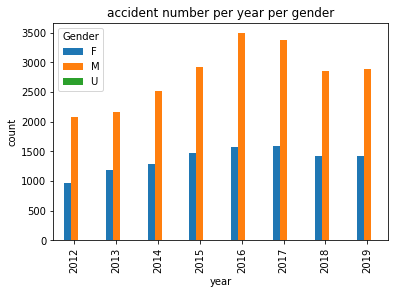

In [784]:
#Gender-wise traffic accidents
g = df[['Accident','Gender','year']]
plt.figure(figsize=(9,9))
count2 = g.groupby(['year','Gender'])
totalsum = count2['Accident'].aggregate(np.sum).unstack()
totalsum.plot(kind = 'bar', title = 'accident number per year per gender')
plt.ylabel('count')
plt.show()

**Insight**: Most of the accidents are due to male in any given year

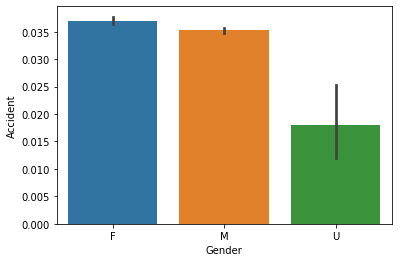

In [785]:
# Plot
sns.barplot(df['Gender'],df['Accident']);

**Insight**: About 3.6% of the total female gender involved in a traffic violation lead to accident which is very also very close to male.

<Figure size 1224x1008 with 0 Axes>

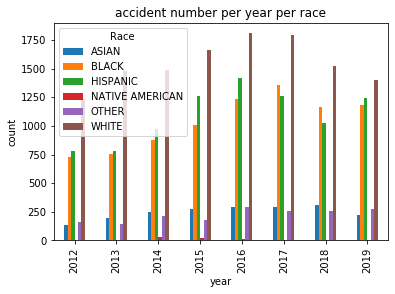

In [786]:
#Race-wise traffic accidents
r = df[['Accident','Race','year']]
plt.figure(figsize=(17,14))
count3 = r.groupby(['year','Race'])
totalsum = count3['Accident'].aggregate(np.sum).unstack()
totalsum.plot(kind = 'bar', title = 'accident number per year per race')
plt.ylabel('count')
plt.show()

**Insight**:Most of the accidents are due to white in any given year and least due to native american

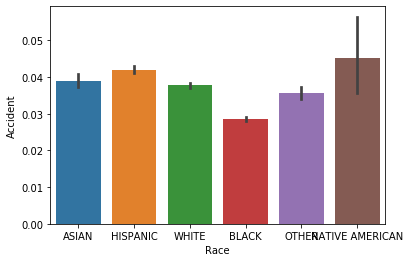

In [787]:
sns.barplot(df['Race'],df['Accident']);

**Insight**: Surprisingly out of the total Native Americans, 4% of them are more involved in accidents which is highest and almost equal to hispanic

In [788]:
#total fatal crashes due to accidents
df1.Fatal.value_counts()

0    33209
1       49
Name: Fatal, dtype: int64

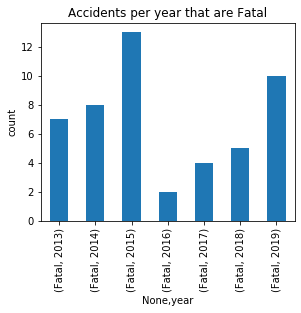

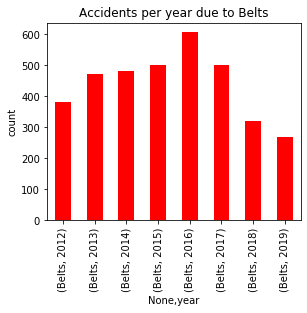

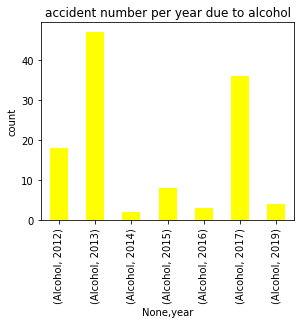

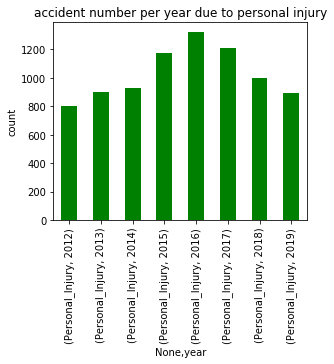

In [789]:
#Analysing the reasons for accident (Seat Belt, Alcohol) and driver's condition after the accident like Fatal and personal injury
plt.figure(figsize=(10,8))
df5 = df1
mask = (df5['Date_Of_Stop'] >= '2012-1-1') & (df5['Date_Of_Stop'] < '2020-1-1') & (df5['Fatal'] != 0)
df5 = df5.loc[mask]

df6 = df5[['Fatal','year']]
count4 = df6.groupby('year')
totalsum = count4.aggregate(np.sum).unstack()
plt.subplot(2,2,1)
totalsum.plot(kind = 'bar', title = 'Accidents per year that are Fatal')
plt.ylabel('count')
plt.show()


plt.figure(figsize=(10,8))
df5 = df1
mask = (df5['Date_Of_Stop'] >= '2012-1-1') & (df5['Date_Of_Stop'] < '2020-1-1') & (df5['Belts'] != 0)
df5 = df5.loc[mask]
df4 = df5[['Belts','year']]
count4 = df4.groupby('year')
totalsum = count4.aggregate(np.sum).unstack()
plt.subplot(2,2,2)
totalsum.plot(kind = 'bar', title = 'Accidents per year due to Belts',color='red')
plt.ylabel('count')
plt.show()


plt.figure(figsize=(10,8))
df5 = df1
mask = (df5['Date_Of_Stop'] >= '2012-1-1') & (df5['Date_Of_Stop'] < '2020-1-1') & (df5['Alcohol'] != 0)
df5 = df5.loc[mask]
df7= df5[['Alcohol','year']]
count3 = df7.groupby('year')
totalsum = count3.aggregate(np.sum).unstack()
plt.subplot(2,2,3)
totalsum.plot(kind = 'bar', title = 'accident number per year due to alcohol',color='yellow')
plt.ylabel('count')
plt.show()


plt.figure(figsize=(10,8))
df5 = df1
mask = (df5['Date_Of_Stop'] >= '2012-1-1') & (df5['Date_Of_Stop'] < '2020-1-1') & (df5['Personal_Injury'] != 0)
df5 = df5.loc[mask]
df8= df5[['Personal_Injury','year']]
count3 = df8.groupby('year')
totalsum = count3.aggregate(np.sum).unstack()
plt.subplot(2,2,4)
totalsum.plot(kind = 'bar', title = 'accident number per year due to personal injury', color='green')
plt.ylabel('count')
plt.show()

**INSIGHT**: We can see most of the accidents are due to seat belt violations than alcohol related. There are no alcohol related accidents in 2018. 2015 has the highest no of accidents that are fatal. In all years there are high number of personal injury cases due to accidents.

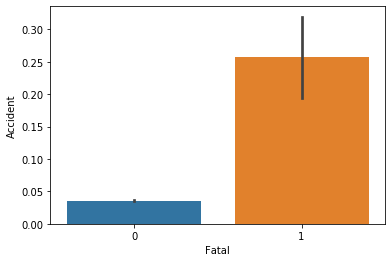

In [790]:
sns.barplot(df['Fatal'],df['Accident']);

**INSIGHT**: Around 25% of the total Fatal cases are due to accidents. Surprisingly, around 70% of Fatal cases are not due to accidents but due to other violations

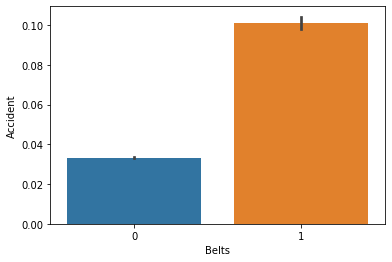

In [791]:
sns.barplot(df['Belts'],df['Accident']);

**INSIGHT**:Around 10% of total cases of not wearing Seat belts violation lead to accident

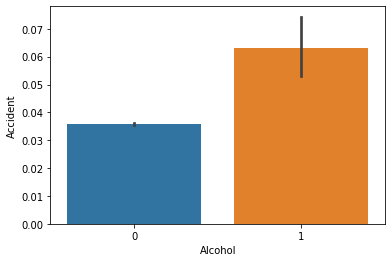

In [792]:
sns.barplot(df['Alcohol'],df['Accident']);

**INSIGHT**: Around 7% of total cases of drunk and drive violations(alcohol) lead to accident

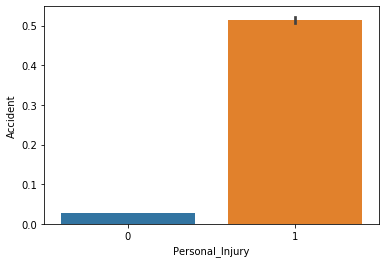

In [793]:
sns.barplot(df['Personal_Injury'],df['Accident']);

**INSIGHT**: Obviously around 50% of the total personal injury cases are due to accidents

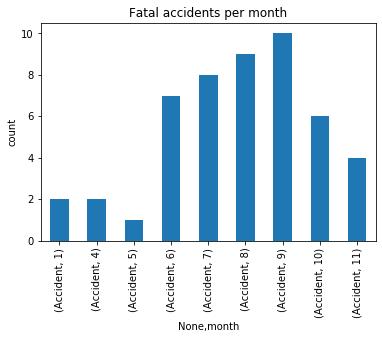

In [794]:
df5 = df1
mask = (df5['Date_Of_Stop'] >= '2012-1-1') & (df5['Date_Of_Stop'] < '2020-1-1') & (df5['Fatal'] != 0)
df5 = df5.loc[mask]

df5 = df5[['Accident','month']]
count4 = df5.groupby('month')
totalsum = count4.aggregate(np.sum).unstack()
totalsum.plot(kind = 'bar', title = 'Fatal accidents per month')
plt.ylabel('count')
plt.show()

**Insight**: More fatal accidents occured in the month of September and a high number over the years during the period of june to september. We can have a more detailed understanding, if we take a look at how severe weather affect driving safety? A future work where we can predict how weather conditions leads to accidents and Fatal crashes

In [795]:
#Violation-wise traffic incidents
sub_df1 = pd.DataFrame(zip(df['Violation_Type'],df['Alcohol'],df['Belts'],df['Fatal'],df['Accident'],df['Work_Zone'],df['Personal_Injury'],df['Property_Damage']), columns=['violation','alcohol','belts','fatal','accident','workzone','personalinjury','propertydamage'])
sub_df1['alcohol'] = sub_df1.alcohol.eq(1).mul(1)
sub_df1['belts'] = sub_df1.belts.eq(1).mul(1)
sub_df1['fatal'] = sub_df1.fatal.eq(1).mul(1)
sub_df1['accident'] = sub_df1.accident.eq(1).mul(1)
sub_df1['workzone'] = sub_df1.workzone.eq(1).mul(1)
sub_df1['personalinjury'] = sub_df1.personalinjury.eq(1).mul(1)
sub_df1['propertydamage'] = sub_df1.propertydamage.eq(1).mul(1)
table1 = pd.pivot_table(sub_df1, values=['alcohol','belts','fatal','accident','workzone','personalinjury','propertydamage'], columns='violation', aggfunc=np.mean)
table1


violation,Citation,ESERO,SERO,Warning
accident,0.050530,0.004150,0.012453,0.006898
alcohol,0.002879,0.000198,0.002491,0.000305
belts,0.040667,0.032907,0.077210,0.031635
fatal,0.000217,0.000148,0.000000,0.000185
personalinjury,0.024250,0.000445,0.000000,0.003676
propertydamage,0.038547,0.002322,0.000000,0.006912
workzone,0.000274,0.000099,0.000000,0.000185


**Insight**: 
1. We can see that Alcohol violations generated citations 9.43 (0.002896/0.000307) times more often than they generated warnings.
2. accident 7.35 (0.050712/0.006899)
3. personal injury 6.65 (0.024236/0.003644)
4. property damage 5.58 (0.038769/0.006937)
5. work zone 1.47 (0.000274/0.000186)

This is much higher than the 1.28 times for Seat Belts (0.040903/0.031754) , 1.17 (0.000219/0.000186) for Fatal Crashes or 1.47 (0.000274/0.000186) for work zone violations. As a result, it would seem that Maryland Police are more strict on alcohol violations than for the other two.

In [796]:
table2 = pd.pivot_table(sub_df1, values=['alcohol','belts','fatal','accident','workzone','personalinjury','propertydamage'], columns='violation', aggfunc=np.sum)
table2

violation,Citation,ESERO,SERO,Warning
accident,31154,84,10,2010
alcohol,1775,4,2,89
belts,25073,666,62,9218
fatal,134,3,0,54
personalinjury,14951,9,0,1071
propertydamage,23766,47,0,2014
workzone,169,2,0,54


<Figure size 1224x1008 with 0 Axes>

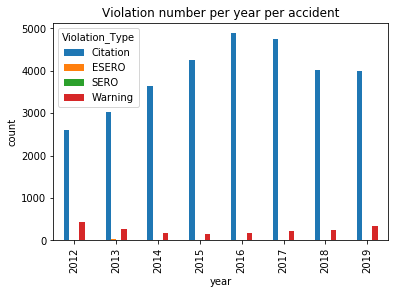

In [797]:
#Violation-wise traffic accidents
df4 = df[['Accident','Violation_Type','year']]
plt.figure(figsize=(17,14))
count3 = df4.groupby(['year','Violation_Type'])
totalsum = count3['Accident'].aggregate(np.sum).unstack()
totalsum.plot(kind = 'bar', title = 'Violation number per year per accident')
plt.ylabel('count')
plt.show()

**Insight**: We can see there are more citations in any given year. But our main motto is to see how strict are MD police on accidents, fatal crashes, property damage, seat belt violations, personal injury and alcohol

In [798]:
#Analysis on violations_types on seat belt, alcohol related and fatal crashes which are main reasons for accidents
table2 = pd.pivot_table(sub_df1, values=['alcohol','belts','fatal'], index=['violation'], aggfunc=np.sum)

In [799]:
table2 = pd.DataFrame(table2, columns=['alcohol','belts','fatal'])
alc_df = table2[table2['alcohol']!=0]
alc_df = alc_df.sort_values('alcohol', ascending=False)
alc_df = pd.DataFrame(alc_df.alcohol,columns=['alcohol'])
alc_df.head()

,alcohol
violation,
Citation,1775
Warning,89
ESERO,4
SERO,2


In [800]:
belts_df = table2[table2['belts']!=0]
belts_df = belts_df.sort_values('belts', ascending=False)
belts_df = pd.DataFrame(belts_df.belts,columns=['belts'])
belts_df.head(30)

,belts
violation,
Citation,25073
Warning,9218
ESERO,666
SERO,62


In [801]:
fatal_df = table2[table2['fatal']!=0]
fatal_df = fatal_df.sort_values('fatal', ascending=False)
fatal_df = pd.DataFrame(fatal_df.fatal,columns=['fatal'])
fatal_df.head(30)

,fatal
violation,
Citation,134
Warning,54
ESERO,3


**Insight**: One clear conclusion here is that, despite the obvious presence of seat belt enforcement measures on the streets of Maryland, there is still a surprisingly large number of violations of the **seat belt code traffic violations(around 25k citations)** when compared to **alcohol traffic violations(around 1.7k)**. This might motivate local and state governments to put more resources toward this or work with vehicle manufacturers to develop methods to reduce such violations.

**Is there a strong link between reckless drivers( under influence of alcohol,seat belt violation ) and road accidents.**

**Predict the likelihood of a driver causing road accident**

In [802]:
sub_df1 = pd.DataFrame(zip(df['Description'],df['SubAgency'],df['Location'],df['Accident'],df['Alcohol'],df['Belts'],df['Fatal'],df['Geolocation'],df['Longitude'],df['Latitude']), columns=['description','subagency','location','accident','alcohol','belts','fatal','co-ordinates','long','lat'])
sub_df1['alcohol'] = sub_df1.alcohol.eq(1).mul(1)
sub_df1['belts'] = sub_df1.belts.eq(1).mul(1)
sub_df1['fatal'] = sub_df1.fatal.eq(1).mul(1)
sub_df1['accident'] = sub_df1.accident.eq(1).mul(1)

In [803]:
table4 = pd.pivot_table(sub_df1, values=['alcohol','belts','fatal','accident'], index=['description'], aggfunc=np.sum)
table4 = pd.DataFrame(table4, columns=['alcohol','belts','fatal','accident'])

In [804]:
acc_df = table4[table4['accident']!=0]
acc_df = acc_df.sort_values('accident', ascending=False)
acc_df = pd.DataFrame(acc_df.accident,columns=['accident'])
acc_df.head(10)

,accident
description,
FAILURE TO CONTROL VEHICLE SPEED ON HIGHWAY TO AVOID COLLISION,6478
"NEGLIGENT DRIVING VEHICLE IN CARELESS AND IMPRUDENT MANNER ENDANGERING PROPERTY, LIFE AND PERSON",2606
DRIVER WHEN TURNING LEFT FAIL TO YIELD RIGHT OF WAY TO VEHICLE APPROACHING FROM OPPOSITE DIRECTION,1822
FAILURE TO CONTROL VEH. SPEED ON HWY. TO AVOID COLLISION,1418
DRIVER CHANGING LANES WHEN UNSAFE,1153
DRIVING VEHICLE WHILE UNDER THE INFLUENCE OF ALCOHOL,1049
DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC CONTROL DEVICE INSTRUCTIONS,983
RECKLESS DRIVING VEHICLE IN WANTON AND WILLFUL DISREGARD FOR SAFETY OF PERSONS AND PROPERTY,918
DRIVER FAILURE TO STOP AT STEADY CIRCULAR RED SIGNAL,899


**INSIGHT:** SPEED CONTROL AND NEGLIGENT DRIVING(Reckless drivers) are the main reason for accidents around 34%. Where as accidents under the influence of alcohol are less when compared to speed driving (less than 10%)

In [805]:
#locations for more accidents over the years
table6 = pd.pivot_table(sub_df1, values=['alcohol','belts','fatal','accident'], index=['location'], aggfunc=np.sum)
table6 = pd.DataFrame(table6, columns=['alcohol','belts','fatal','accident'])

In [806]:
acc_df = table6[table6['accident']!=0]
acc_df = acc_df.sort_values('accident', ascending=False)
acc_df = pd.DataFrame(acc_df.accident,columns=['accident'])
acc_df.head(10)

,accident
location,
GEORGIA AVE/FOREST GLEN RD,50
11219 GRANDVIEW AVE,43
3400 MAY ST,40
GEORGIA AVE @ HEWITT AVE,39
RANDOLPH RD / CONNECTICUT AVE,38
CLARA BARTON PKWY,36
NEW HAMPSHIRE AVE @ RANDOLPH RD,33
CONNECTICUT AVE @ VEIRS MILL RD,31
GEORGIA AVE @ RANDOLPH RD,30


**INSIGHT:** GEORGIA AVE/FOREST GLEN RD location has recorded more no of accidents over the eight years around 50

In [807]:
#Geographical hotspots for more accidents over the years
table8 = pd.pivot_table(sub_df1, values=['alcohol','belts','fatal','accident'], index=['long','lat','location'], aggfunc=np.sum)
table8 = pd.DataFrame(table8, columns=['alcohol','belts','fatal','accident'])

In [808]:
acc_df = table8[table8['accident']!=0]
acc_df = acc_df.sort_values('accident', ascending=False)
acc_df = pd.DataFrame(acc_df.accident,columns=['accident'])
acc_df.head(10)

,,,accident
long,lat,location,
-77.048618,39.059903,3400 MAY ST,40
-77.235740,39.113415,CLARA BARTON PKWY,32
-77.001010,39.043590,9909 DILSTON RD,28
-76.982647,39.042938,1006 KERWIN ROAD,28
-77.109880,38.997783,CONNECTICUT AVE AT KENSINGTON PKW,27
-77.070242,39.041697,NB COLUMBIA PIKE/GREENCASTLE RD,27
-77.048175,39.058374,GEORGIA AVE/FOREST GLEN RD,26
-76.992220,39.049957,1510 DILSTON ROAD,26
-76.941968,38.950277,DEMOCRACY BLVD/ FERNWOOD,25


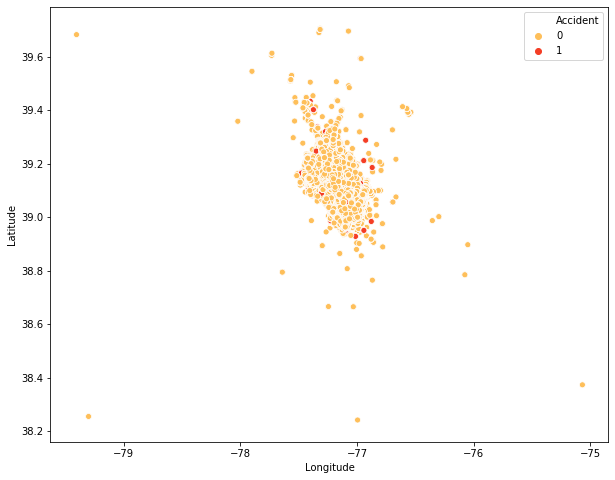

In [809]:
#Accident plot in the whole traffic violations recorded
plt.figure(figsize=(10,8))
sns.scatterplot(x='Longitude', y='Latitude', hue='Accident',palette='YlOrRd', data=df)

**INSIGHT**: Most of the accidents recorded are at the northern part of the county

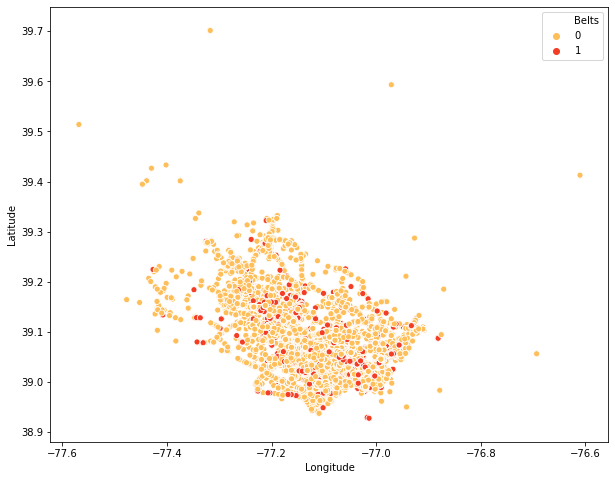

In [810]:
#Seat Belt violations plot in traffic accidents recorded
plt.figure(figsize=(10,8))
sns.scatterplot(x='Longitude', y='Latitude', hue='Belts',palette='YlOrRd', data=df1)

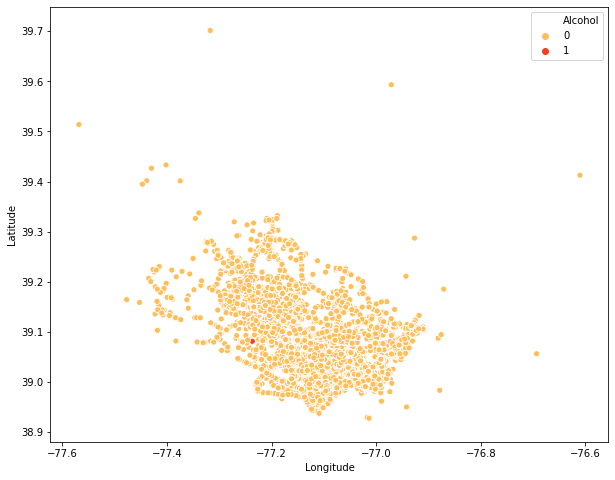

In [811]:
#Alcohol related plot in traffic accidents recorded
plt.figure(figsize=(10,8))
sns.scatterplot(x='Longitude', y='Latitude', hue='Alcohol',palette='YlOrRd', data=df1)

**INSIGHT**: From the above two scatter plots we could see more no of accidents are due to seat belt violations than alcohol related.

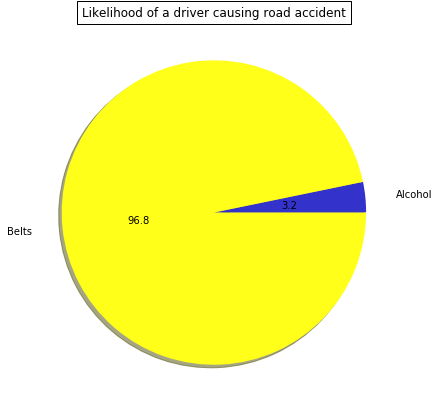

In [812]:
#Likelihood of a driver causing accident
slices=[((df.Accident==1) & (df.Alcohol==1)).sum(),
        ((df.Accident==1) & (df.Belts==1)).sum(),
       ]
labels=['Alcohol','Belts']
colors = ['#3333cc','#ffff1a']
plt.pie(slices,colors=colors, labels=labels, autopct='%.1f', pctdistance=.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Likelihood of a driver causing road accident", bbox={'facecolor':'2', 'pad':5})

fig.set_size_inches(7,7)
plt.show()

**INSIGHT:** When compared between seat belt violation and alcohol related accidents, a driver under seat belt violations (97%) resulted in more accidents than alcohol (just 3%). Again a conclusion that despite the obvious presence of seat belt enforcement measures, there is still a surprisingly large number of violations leading to accidents.

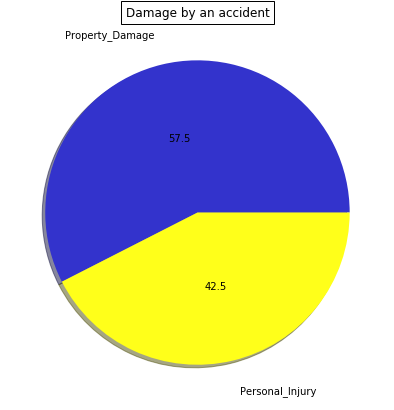

In [813]:
#Damage by an accident
slices=[((df.Accident==1) & (df.Property_Damage==1)).sum(),
        ((df.Accident==1) & (df.Personal_Injury==1)).sum(),
       ]
labels=['Property_Damage','Personal_Injury']
colors = ['#3333cc','#ffff1a']
plt.pie(slices,colors=colors, labels=labels, autopct='%.1f', pctdistance=.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Damage by an accident", bbox={'facecolor':'2', 'pad':5})

fig.set_size_inches(7,7)
plt.show()

**INSIGHT:** When compared between property damage or personal injury in accidents, property damage done by an accident is more than personal injury

In [814]:
#Reasons for an accident
sub_df1 = pd.DataFrame(zip(df['Accident'],df['Alcohol'],df['Belts'],df['Fatal'],df['Work_Zone'],df['Personal_Injury'],df['Property_Damage']), columns=['accident','alcohol','belts','fatal','workzone','personalinjury','propertydamage'])
sub_df1['alcohol'] = sub_df1.alcohol.eq(1).mul(1)
sub_df1['belts'] = sub_df1.belts.eq(1).mul(1)
sub_df1['fatal'] = sub_df1.fatal.eq(1).mul(1)
sub_df1['accident'] = sub_df1.accident.eq(1).mul(1)
sub_df1['workzone'] = sub_df1.workzone.eq(1).mul(1)
sub_df1['personalinjury'] = sub_df1.personalinjury.eq(1).mul(1)
sub_df1['propertydamage'] = sub_df1.propertydamage.eq(1).mul(1)
table1 = pd.pivot_table(sub_df1, values=['alcohol','belts','fatal','workzone','personalinjury','propertydamage'], columns='accident', aggfunc=np.sum)
table1

accident,0,1
alcohol,1752,118
belts,31483,3536
fatal,142,49
personalinjury,7791,8240
propertydamage,14675,11152
workzone,212,13


In [815]:
sub_df1 = pd.DataFrame(zip(df['Accident'],df['Alcohol'],df['Belts'],df['Fatal']), columns=['accident','alcohol','belts','fatal'])
sub_df1['alcohol'] = sub_df1.alcohol.eq(1).mul(1)
sub_df1['belts'] = sub_df1.belts.eq(1).mul(1)
sub_df1['fatal'] = sub_df1.fatal.eq(1).mul(1)
table1 = pd.pivot_table(sub_df1, values=['alcohol','belts','fatal'], columns='accident', aggfunc=np.mean)
table1

accident,0,1
alcohol,0.001956,0.003548
belts,0.035148,0.106320
fatal,0.000159,0.001473


**INSIGHT**:
1. alcohol related leading to accident is 1.80 times more than not leading to accident
2. seat belt violation leading to accident is 3.01 times more than not leading to accident

In [816]:
#Reasons for an fatal crashes
sub_df1 = pd.DataFrame(zip(df['Accident'],df['Alcohol'],df['Belts'],df['Fatal']), columns=['accident','alcohol','belts','fatal'])
sub_df1['alcohol'] = sub_df1.alcohol.eq(1).mul(1)
sub_df1['belts'] = sub_df1.belts.eq(1).mul(1)
sub_df1['fatal'] = sub_df1.fatal.eq(1).mul(1)
sub_df1['accident'] = sub_df1.accident.eq(1).mul(1)
table1 = pd.pivot_table(sub_df1, values=['alcohol','belts','accident'], columns='fatal', aggfunc=np.sum)
table1

fatal,0,1
accident,33209,49
alcohol,1870,0
belts,35009,10


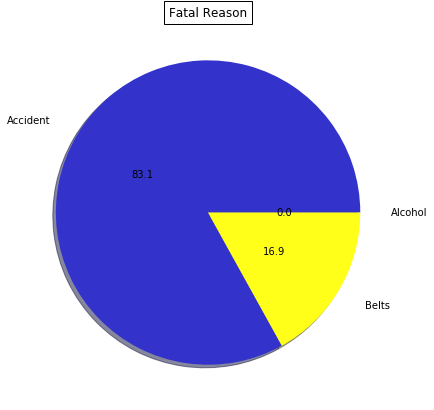

In [817]:
slices=[((df.Fatal==1) & (df.Accident==1)).sum(),
        ((df.Fatal==1) & (df.Belts==1)).sum(),
        ((df.Fatal==1) & (df.Alcohol==1)).sum(),
       ]
labels=['Accident','Belts','Alcohol']
colors = ['#3333cc','#ffff1a','#c2c2d6']
plt.pie(slices,colors=colors, labels=labels, autopct='%.1f', pctdistance=.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Fatal Reason", bbox={'facecolor':'2', 'pad':5})

fig.set_size_inches(7,7)
plt.show()

**INSIGHT**: When compared to accident, seat belt violations and alcohol. Obviously most of the fatal crashes are due to other type accidents than belt violations and alcohol related accidents. Surprisingly No alcohol related lead to a fatal crash

In [818]:
description = pd.DataFrame(list(zip(df.Description.value_counts().index,df.Description.value_counts())), columns=['Description','value'], index=None)

**Based on the description column details can we identify whether its a moving or a non moving traffic violation?**

In [819]:
#Most common reasons for violations
from wordcloud import WordCloud, STOPWORDS
catcloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          width=1440,
                          height=1080
                         ).generate(" ".join(description['Description'].values))

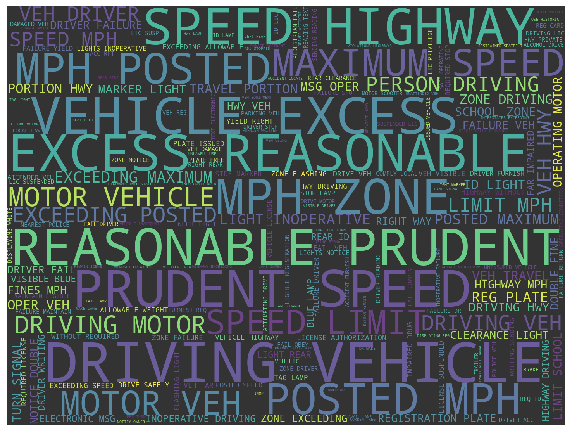

In [820]:
fig = plt.figure(1,figsize=(10,8))
plt.imshow(catcloud, alpha=0.8)
plt.axis('off')
plt.show()

**INSIGHT**: Based on the description column we could see most of the violations are due to prudent speed(driving faster than reasonable speed), speed driving, MPH zone(crossing the MPH speed). Also we could see most of the violations are due to moving car violations rather than non-moving like parking tickets etc.,

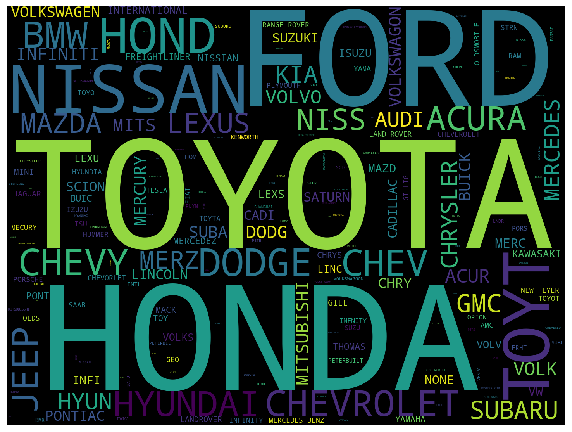

In [821]:
#most common car maker in traffic accidents
from wordcloud import WordCloud
wordcloud = (WordCloud(width=1440, height=1080).generate_from_frequencies(df1.Make.value_counts()))


fig = plt.figure(1,figsize=(10,8))
plt.imshow(wordcloud)
plt.axis('off');

**INSIGHTS**: Toyota, Ford and Honda are involved in most of the accidents

## **DATA MODELLING**

 Applying models to predict if a traffic violation has lead to accident
  1. Converting the categorical data to numerical data
  2. LabelEncoder used for converting categorical data to numerical data(Automatic)

In [822]:
#Traffic violations
df.dtypes

Date_Of_Stop               datetime64[ns]
Time_Of_Stop               datetime64[ns]
SubAgency                          object
Description                        object
Location                           object
Latitude                          float64
Longitude                         float64
Accident                            int32
Belts                               int32
Personal_Injury                     int32
Property_Damage                     int32
Fatal                               int32
Commercial_License                  int32
Commercial_Vehicle                  int32
Alcohol                             int32
Work_Zone                           int32
VehicleType                        object
Make                               object
Model                              object
Violation_Type                     object
Contributed_To_Accident              bool
Race                               object
Gender                             object
Geolocation                       

In [823]:
#Traffic accidents
df1.dtypes

Date_Of_Stop               datetime64[ns]
Time_Of_Stop               datetime64[ns]
SubAgency                          object
Description                        object
Location                           object
Latitude                          float64
Longitude                         float64
Accident                            int32
Belts                               int32
Personal_Injury                     int32
Property_Damage                     int32
Fatal                               int32
Commercial_License                  int32
Commercial_Vehicle                  int32
Alcohol                             int32
Work_Zone                           int32
VehicleType                        object
Make                               object
Model                              object
Violation_Type                     object
Contributed_To_Accident              bool
Race                               object
Gender                             object
Geolocation                       

#### From the heatmap which is produced we see that its the "Accident" that is having high value of correlation with "Property_Damage". Therefore, we will be using this for our regression.

In [824]:
acc=df["Accident"]
prop_damage=df["Property_Damage"]
print(acc.shape)
print(prop_damage.shape)

(928972,)
(928972,)


In [825]:
X_train, X_test, Y_train, Y_test = train_test_split(acc, prop_damage, test_size=0.2, random_state=42)
print(X_train.shape)
print(Y_train.shape)

(743177,)
(743177,)


In [826]:
X_training = X_train[:, np.newaxis]
Y_training = Y_train[:, np.newaxis]
X_testing = X_test[:, np.newaxis]
Y_testing = Y_test[:, np.newaxis]

In [827]:
logreg = LogisticRegression()
logreg.fit(X_training, Y_training)
Y_Predicting = logreg.predict(X_testing)
print(np.shape(X_training), np.shape(Y_training))

(743177, 1) (743177, 1)


In [828]:
print("Coefficeint obtained by Logistic regression:",logreg.coef_)

Coefficeint obtained by Logistic regression: [[3.40442162]]


In [829]:
#Also Belts and Personal_Injury have a good correlation so lets test and see
belts=df["Belts"]
pers_injury=df["Personal_Injury"]
print(belts.shape)
print(pers_injury.shape)

(928972,)
(928972,)


In [830]:
X_train, X_test, Y_train, Y_test = train_test_split(belts, pers_injury, test_size=0.2, random_state=42)
print(X_train.shape)
print(Y_train.shape)

(743177,)
(743177,)


In [831]:
X_training = X_train[:, np.newaxis]
Y_training = Y_train[:, np.newaxis]
X_testing = X_test[:, np.newaxis]
Y_testing = Y_test[:, np.newaxis]

In [832]:
logreg = LogisticRegression()
logreg.fit(X_training, Y_training)
Y_Predicting = logreg.predict(X_testing)
print(np.shape(X_training), np.shape(Y_training))

(743177, 1) (743177, 1)


In [833]:
print("Coefficeint obtained by Logistic regression:",logreg.coef_)

Coefficeint obtained by Logistic regression: [[1.8689267]]


**Comments:** The coefficient obtained by logistic regression for (Belts and Personal_Injury) is slightly less than (Accident and property_damage) but since my analysis is to predict accidents. Lets concentrate on accidents.

In [834]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()

In [835]:
df.Description = labelEncoder.fit_transform(df.Description.astype(str))
labelEncoder.classes_

array([')',
       ', ATTEMPTING TO DRIVE MOTOR VEHICLE ON HIGHWAY WITHOUT REQUIRED LICENSE AND AUTHORIZATION',
       ', MARKER LIGHT INOPERATIVE', ..., 'veh display blue lamp',
       'veh with visible blue lamp',
       'windshield NOT SPECIFICALLY PROVIDED FOR NOT IN SAFE OPERATING CONDITION'],
      dtype=object)

In [836]:
df.Race = labelEncoder.fit_transform(df.Race)
df.Gender = labelEncoder.fit_transform(df.Gender)
df.Date_Of_Stop = labelEncoder.fit_transform(df.Date_Of_Stop)
df.Geolocation = labelEncoder.fit_transform(df.Geolocation)
df.Time_Of_Stop = labelEncoder.fit_transform(df.Time_Of_Stop)
df.month_code = labelEncoder.fit_transform(df.month_code)
df.day_code = labelEncoder.fit_transform(df.day_code)
df.Violation_Type = labelEncoder.fit_transform(df.Violation_Type)
df.Model = labelEncoder.fit_transform(df.Model)
df.Make = labelEncoder.fit_transform(df.Make)
df.VehicleType = labelEncoder.fit_transform(df.VehicleType)
df.SubAgency = labelEncoder.fit_transform(df.SubAgency)


In [837]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 928972 entries, 2019-07-30 to 2019-04-26
Data columns (total 31 columns):
Date_Of_Stop               928972 non-null int64
Time_Of_Stop               928972 non-null int64
SubAgency                  928972 non-null int32
Description                928972 non-null int32
Location                   928972 non-null object
Latitude                   928972 non-null float64
Longitude                  928972 non-null float64
Accident                   928972 non-null int32
Belts                      928972 non-null int32
Personal_Injury            928972 non-null int32
Property_Damage            928972 non-null int32
Fatal                      928972 non-null int32
Commercial_License         928972 non-null int32
Commercial_Vehicle         928972 non-null int32
Alcohol                    928972 non-null int32
Work_Zone                  928972 non-null int32
VehicleType                928972 non-null int32
Make                       928972 n

In [838]:
df.head()

,Date_Of_Stop,Time_Of_Stop,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,Personal_Injury,...,Race,Gender,Geolocation,Violation,year,month,day_of_week,day_code,month_code,hour
Date_Of_Stop,,,,,,,,,,,,,,,,,,,,,
2019-07-30,2766,1335,1,5523,RIVER RD/ROYAL DOMINION DR,38.990102,-77.151645,0,0,0,...,0,0,31662,1,2019,7,1,5,5,23
2019-07-07,2743,1374,3,7030,ENNALLS AVE @ GEORGIA AVE,39.040360,-77.051137,0,0,0,...,2,1,149829,1,2019,7,6,3,5,23
2019-08-15,2782,1362,1,2698,355 AT JONES BRIDGE RD,38.997645,-77.096600,0,0,0,...,5,0,58168,1,2019,8,3,4,1,23
2019-07-13,2749,731,2,11105,GEORGIA/ BALLARD ST,39.000932,-77.033183,0,0,0,...,2,1,71939,1,2019,7,5,2,5,13
2019-07-18,2754,667,1,2818,RIVER RD/BRAEBURN PKWY,38.978310,-77.130543,0,0,0,...,5,1,8619,1,2019,7,3,4,5,12


In [839]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [840]:
x = df.drop(['Contributed_To_Accident','Location'],axis=1)
y = df['Accident']

In [841]:
x.columns

Index(['Date_Of_Stop', 'Time_Of_Stop', 'SubAgency', 'Description', 'Latitude',
       'Longitude', 'Accident', 'Belts', 'Personal_Injury', 'Property_Damage',
       'Fatal', 'Commercial_License', 'Commercial_Vehicle', 'Alcohol',
       'Work_Zone', 'VehicleType', 'Make', 'Model', 'Violation_Type', 'Race',
       'Gender', 'Geolocation', 'Violation', 'year', 'month', 'day_of_week',
       'day_code', 'month_code', 'hour'],
      dtype='object')

In [842]:
x.head()

,Date_Of_Stop,Time_Of_Stop,SubAgency,Description,Latitude,Longitude,Accident,Belts,Personal_Injury,Property_Damage,...,Race,Gender,Geolocation,Violation,year,month,day_of_week,day_code,month_code,hour
Date_Of_Stop,,,,,,,,,,,,,,,,,,,,,
2019-07-30,2766,1335,1,5523,38.990102,-77.151645,0,0,0,0,...,0,0,31662,1,2019,7,1,5,5,23
2019-07-07,2743,1374,3,7030,39.040360,-77.051137,0,0,0,0,...,2,1,149829,1,2019,7,6,3,5,23
2019-08-15,2782,1362,1,2698,38.997645,-77.096600,0,0,0,0,...,5,0,58168,1,2019,8,3,4,1,23
2019-07-13,2749,731,2,11105,39.000932,-77.033183,0,0,0,0,...,2,1,71939,1,2019,7,5,2,5,13
2019-07-18,2754,667,1,2818,38.978310,-77.130543,0,0,0,0,...,5,1,8619,1,2019,7,3,4,5,12


In [843]:
x.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 928972 entries, 2019-07-30 to 2019-04-26
Data columns (total 29 columns):
Date_Of_Stop          928972 non-null int64
Time_Of_Stop          928972 non-null int64
SubAgency             928972 non-null int32
Description           928972 non-null int32
Latitude              928972 non-null float64
Longitude             928972 non-null float64
Accident              928972 non-null int32
Belts                 928972 non-null int32
Personal_Injury       928972 non-null int32
Property_Damage       928972 non-null int32
Fatal                 928972 non-null int32
Commercial_License    928972 non-null int32
Commercial_Vehicle    928972 non-null int32
Alcohol               928972 non-null int32
Work_Zone             928972 non-null int32
VehicleType           928972 non-null int32
Make                  928972 non-null int32
Model                 928972 non-null int32
Violation_Type        928972 non-null int32
Race                  928972 non-

In [844]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
print(x_train.shape)
print(y_train.shape)

(743177, 29)
(743177,)


Since I am classifying the relationship between accidents(Y) and features predicting the target variable(X), Logistic and KNN are preferred models

**Logistic Regression**

In [845]:
# Fit logistic regression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [846]:
from sklearn import metrics

In [847]:
y_pred=logreg.predict(x_test)
acc_score=metrics.accuracy_score(y_test,y_pred)
print("accuracy of Test:", acc_score)
print("mean square error of Test:", metrics.mean_squared_error(y_test,y_pred))

accuracy of Test: 0.9641163648106784
mean square error of Test: 0.03588363518932156


In [849]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [850]:
count = np.count_nonzero(y_pred)
print(count)

0


In [851]:
y_pred=logreg.predict(x_train)
acc_score = metrics.accuracy_score(y_train,y_pred)
print("accuracy of Train:", acc_score)

accuracy of Train: 0.9642198291927764


**Comments**: Since when all the features are considered for training set even though the prediction score is good but all the predicted value says no violation has lead to accident. So lets take a training dataset of highly correlated features.

In [852]:
#new features training data set
x = df.iloc[:,[8,9,10,11,14,15,21,22,27,30]]
y = df['Accident']

In [853]:
x.columns

Index(['Belts', 'Personal_Injury', 'Property_Damage', 'Fatal', 'Alcohol',
       'Work_Zone', 'Race', 'Gender', 'day_of_week', 'hour'],
      dtype='object')

In [854]:
x.head()

,Belts,Personal_Injury,Property_Damage,Fatal,Alcohol,Work_Zone,Race,Gender,day_of_week,hour
Date_Of_Stop,,,,,,,,,,
2019-07-30,0,0,0,0,0,0,0,0,1,23
2019-07-07,0,0,0,0,0,0,2,1,6,23
2019-08-15,0,0,0,0,0,0,5,0,3,23
2019-07-13,0,0,0,0,0,0,2,1,5,13
2019-07-18,0,0,0,0,0,0,5,1,3,12


In [855]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
print(x_train.shape)
print(y_train.shape)

(743177, 10)
(743177,)


In [856]:
#performing the logistic regression again for new features
# Fit logistic regression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [857]:
y_pred=logreg.predict(x_test)
acc_score=metrics.accuracy_score(y_test,y_pred)
print("accuracy of Test:", acc_score)
print("mean square error of Test:", metrics.mean_squared_error(y_test,y_pred))

accuracy of Test: 0.9647891493312521
mean square error of Test: 0.035210850668747816


In [858]:
np.unique(y_pred, return_index=False, return_inverse=False, return_counts=False, axis=None)

array([0, 1])

In [860]:
count = np.count_nonzero(y_pred)
print(count)
#2189 accidents have been predicted

2189


In [861]:
y_pred=logreg.predict(x_train)
acc_score = metrics.accuracy_score(y_train,y_pred)
print("accuracy of Train:", acc_score)

accuracy of Train: 0.9648213009821348


**Logistic regression**
* accuracy of Test: 0.9647891493312521
* mean square error of Test: 0.035210850668747816

**KNN Classifier**

In [862]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [863]:
knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [864]:
y_pred=knn.predict(x_train)
acc_score=metrics.accuracy_score(y_train,y_pred)
print("Accuracy of Train:", acc_score)

Accuracy of Train: 0.9704202363636119


In [865]:
y_pred=knn.predict(x_test)
acc_score=metrics.accuracy_score(y_test,y_pred)
print("Accuracy of Test:", acc_score)
print("Mean square error of Test:", metrics.mean_squared_error(y_test,y_pred))

Accuracy of Test: 0.9684652439516671
Mean square error of Test: 0.03153475604833284


In [866]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [867]:
y_test

Date_Of_Stop
2015-11-08    0
2015-09-26    0
2015-08-27    0
2017-08-30    0
2018-12-11    0
             ..
2019-03-27    0
2013-09-18    0
2013-07-03    0
2015-12-02    0
2016-04-30    0
Name: Accident, Length: 185795, dtype: int32

In [868]:
np.unique(y_pred, return_index=False, return_inverse=False, return_counts=False, axis=None)

array([0, 1])

In [869]:
count = np.count_nonzero(y_pred)
print(count)
#2660 accidents have been predicted

2660


**KNN Classifier**:
* Accuracy of Test: 0.9684652439516671
* Mean square error of Test: 0.03153475604833284

**Random Forest**

In [870]:
from sklearn.ensemble import RandomForestRegressor
RForest=RandomForestRegressor(n_estimators=5,random_state=329,min_samples_leaf=.0001)

In [871]:
RForest.fit(x_train,y_train)
y_predict=RForest.predict(x_test)

In [872]:
from sklearn.metrics import r2_score
print('accuracy: %.3f ' % (r2_score(y_test,y_predict)))

accuracy: 0.268 


In [873]:
y_predict = RForest.predict(x_test)
print("Mean squared error: ",mean_squared_error(y_test,y_predict))

Mean squared error:  0.02533853630746182


In [874]:
y_predict

array([0.0359101 , 0.01289625, 0.00742264, ..., 0.0091314 , 0.01854287,
       0.02333122])

**Comment**:Since the target variable in my regression is discrete, Logistic regression and KNN are best models to solve and predict. Also we can see Logistic and KNN provided best results with highest accuracy.
With KNN classifier we got 96.8% Accuracy

**Prediction of location that involved in accidents using KNN classifier with optimized K**

In [875]:
#location from accident dataset
loc = df1.iloc[:,[4]]
loc.head()

,Location
Date_Of_Stop,
2016-11-04,1415 BLOCK OF ASHTON RD
2014-03-31,FREDERICK RD/ SHADY GROVE RD
2019-02-22,GERMANTOWN RD / AIRCRAFT DRIVE
2015-10-26,WILLOW HILL LA @ BOWIE MILL RD
2019-12-13,I270 SB @ FALLS RD


In [59]:
loc1=np.array(loc)

In [60]:
df1.shape

(33258, 31)

In [61]:
data = df1.iloc[:,[5,6,7,8,9,10,11,14,15]]

In [62]:
data.head()

,Latitude,Longitude,Accident,Belts,Personal_Injury,Property_Damage,Fatal,Alcohol,Work_Zone
Date_Of_Stop,,,,,,,,,
2016-11-04,39.154563,-77.055165,1,0,1,0,0,0,0
2014-03-31,39.149727,-77.233670,1,0,1,0,0,0,0
2019-02-22,39.182450,-77.260197,1,0,0,0,0,0,0
2015-10-26,39.135730,-77.121563,1,1,0,1,0,0,0
2019-12-13,39.077043,-77.168302,1,1,0,1,0,0,0


In [63]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(
data, loc1, test_size=0.2, random_state=42)

In [64]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures

In [65]:
import warnings
warnings.filterwarnings('ignore')
k = 7
knn = KNeighborsClassifier(n_neighbors=k)
accuracy = cross_val_score(knn, X_train2, y_train2, cv=10, scoring='accuracy')
print (accuracy.mean())

0.7236621603639034


In [66]:
import warnings
warnings.filterwarnings('ignore')
accuracy_array = []
k_array = []
for k in range(1,50,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    accuracy = cross_val_score(knn, X_train2, y_train2, cv=10, scoring='accuracy')
    accuracy_array.append(accuracy.mean())
    k_array.append(k)
print (accuracy_array)
print(k_array)

[0.873606591106195, 0.810521760549376, 0.7678709589454661, 0.7236621603639034, 0.6845891996492762, 0.6399299261800921, 0.6084475852133954, 0.5765040576747993, 0.5470984075656389, 0.5190686103709707, 0.4939549439678812, 0.47585073094215186, 0.45598649152342263, 0.4387953205268033, 0.4222676705799103, 0.4106616771460798, 0.39378704149607796, 0.3826057255034597, 0.371605584583767, 0.36012506785662335, 0.35362386033436805, 0.3421944463583412, 0.33225096729581993, 0.32090677410814894, 0.31521166063904976]
[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]


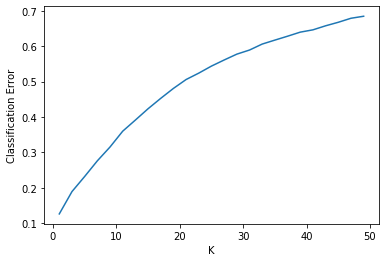

In [67]:
class_error = 1.0 - np.array(accuracy_array)
plt.plot(k_array, class_error)
plt.xlabel('K')
plt.ylabel('Classification Error')
plt.show()

In [68]:
minv = np.argmin(class_error)
OptK = k_array[minv]
print ("Optimal value of K is %d " %  OptK)

Optimal value of K is 1 


In [69]:
knn = KNeighborsClassifier(n_neighbors=OptK)

# fitting the model
knn.fit(X_train2, y_train2)

# predict
pred = knn.predict(X_test2)

# evaluate accuracy
print(accuracy_score(y_test2, pred))

0.6689717378232111


In [70]:
pred

array(['NB 29 / GREENCASTLE RD', 'REDLAND RD @ CRABBS BRANCH WAY',
       'RAMP FRO 270 N TO W. MONTGOMERY W/B', ...,
       'DARNESTOWN RD/GLEN MILL RD', 'NEW HAMPSHIRE AVE @ ELTON RD',
       'GEORGIA  AVE/ HEWITT'], dtype=object)

In [71]:
y_test2

array([['NB COLUMBIA PIKE @ GREENCASTLE BLVD'],
       ['NB REDLAND RD AT CRABBS BRANCH WAY'],
       ['S/B I270 @ FALLLS'],
       ...,
       ['DARNESTOWN RD/GLEN MILL RD'],
       ['NEW HAMPSHIRE AVE @ ELTON RD'],
       ['GEORGIA  AVE/ HEWITT']], dtype=object)

**INSIGHT**:Predicted the accident prone locations from traffic violations dataset 

**Accident prediction using optimized k**

In [144]:
acc = df.iloc[:,[20]]
acc.head()

,Contributed_To_Accident
Date_Of_Stop,
2019-07-30,False
2019-07-07,False
2019-08-15,False
2019-07-13,False
2019-07-18,False


In [757]:
df.Description = labelEncoder.fit_transform(df.Description.astype(str))
labelEncoder.classes_

array([')',
       ', ATTEMPTING TO DRIVE MOTOR VEHICLE ON HIGHWAY WITHOUT REQUIRED LICENSE AND AUTHORIZATION',
       ', MARKER LIGHT INOPERATIVE', ..., 'veh display blue lamp',
       'veh with visible blue lamp',
       'windshield NOT SPECIFICALLY PROVIDED FOR NOT IN SAFE OPERATING CONDITION'],
      dtype=object)

In [42]:
df1.Race = labelEncoder.fit_transform(df1.Race.astype(str))
labelEncoder.classes_

array(['ASIAN', 'BLACK', 'HISPANIC', 'NATIVE AMERICAN', 'OTHER', 'WHITE'],
      dtype=object)

In [43]:
df1.Gender = labelEncoder.fit_transform(df1.Gender.astype(str))
labelEncoder.classes_

array(['F', 'M', 'U'], dtype=object)

In [145]:
data1 =  df.iloc[:,[3,5,6,8,9,10,11,14,15,21,22,27,30]]

In [146]:
data1.head()

,Description,Latitude,Longitude,Belts,Personal_Injury,Property_Damage,Fatal,Alcohol,Work_Zone,Race,Gender,day_of_week,hour
Date_Of_Stop,,,,,,,,,,,,,
2019-07-30,5523,38.990102,-77.151645,0,0,0,0,0,0,0,0,1,23
2019-07-07,7030,39.040360,-77.051137,0,0,0,0,0,0,2,1,6,23
2019-08-15,2698,38.997645,-77.096600,0,0,0,0,0,0,5,0,3,23
2019-07-13,11105,39.000932,-77.033183,0,0,0,0,0,0,2,1,5,13
2019-07-18,2818,38.978310,-77.130543,0,0,0,0,0,0,5,1,3,12


In [147]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(
data1, acc, test_size=0.2, random_state=42)

In [766]:
import warnings
warnings.filterwarnings('ignore')
k = 7
knn = KNeighborsClassifier(n_neighbors=k)
accuracy = cross_val_score(knn, X_train2, y_train2, cv=10, scoring='accuracy')
print (accuracy.mean())

0.9645225818483241


In [767]:
import warnings
warnings.filterwarnings('ignore')
accuracy_array = []
k_array = []
for k in range(1,50,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    accuracy = cross_val_score(knn, X_train2, y_train2, cv=10, scoring='accuracy')
    accuracy_array.append(accuracy.mean())
    k_array.append(k)
print (accuracy_array)
print(k_array)

[0.9554964703185899, 0.9630559072479468, 0.9640274119341632, 0.9645225818483241, 0.9647163448766081, 0.964857629806993, 0.9650244823235223, 0.9649329828863925, 0.9650594664849088, 0.9650836879950411, 0.9650675407139115, 0.9651361658937768, 0.9652034444725841, 0.9651590399337824, 0.9651496208237542, 0.9651872980786209, 0.9652330468104386, 0.9651953712212851, 0.9652115176152503, 0.9652209362545294, 0.9651967161747367, 0.9651617305468051, 0.9651617311080788, 0.9651227093342986, 0.9651254007982841]
[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]


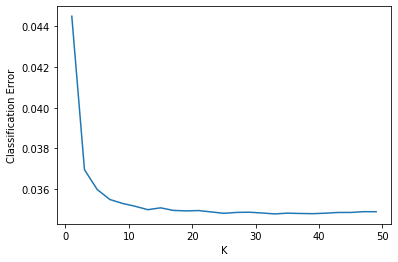

In [768]:
class_error = 1.0 - np.array(accuracy_array)
plt.plot(k_array, class_error)
plt.xlabel('K')
plt.ylabel('Classification Error')
plt.show()

In [770]:
minv = np.argmin(class_error)
OptK = k_array[minv]
print ("Optimal value of K is %d " %  OptK)

Optimal value of K is 33 


In [771]:
knn = KNeighborsClassifier(n_neighbors=OptK)

# fitting the model
knn.fit(X_train2, y_train2)

# predict
pred = knn.predict(X_test2)

# evaluate accuracy
print(accuracy_score(y_test2, pred))

0.9649829112731775


**INSIGHT**: Even with prediction of accidents by calculating optimized k using KNN Classifier, the accuracy of the test scores for both are almost same.

## **SUMMARY**:
## Traffic Violation causes and Accident Analysis

**VENKATA YAGNESH SURIBHATLA**

**UIN - 01166231**

**Observations**:

We compare various feature of the data set with our target column and come up with various visual aid to find which all features are highly co-related to our target variable.Based on these co-relation features we then build predictive models to predict the if a violation has contributed to accident or not based on the given set of features.

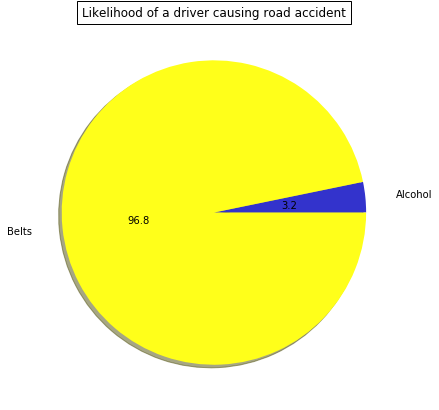

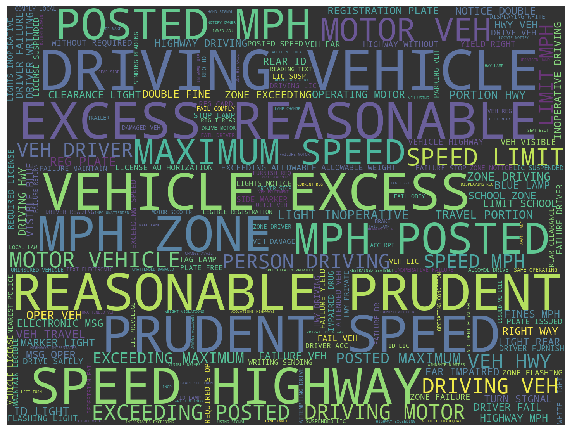

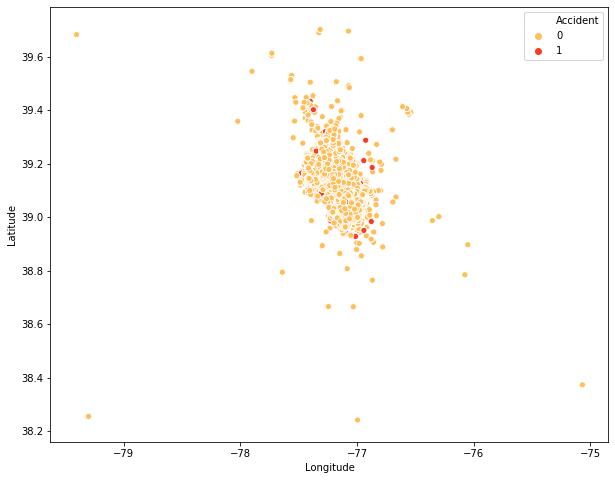

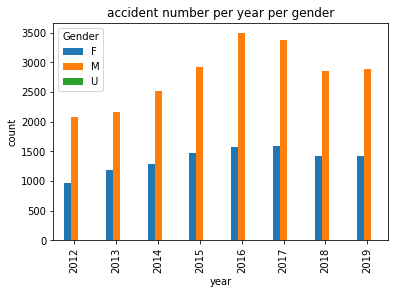

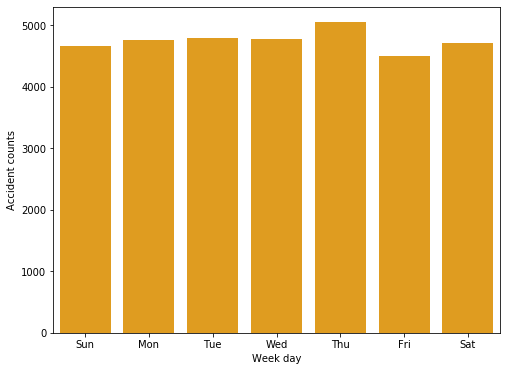

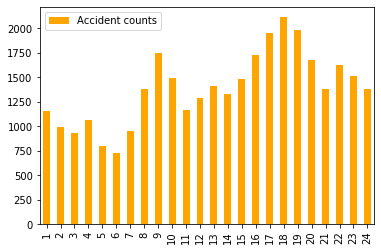

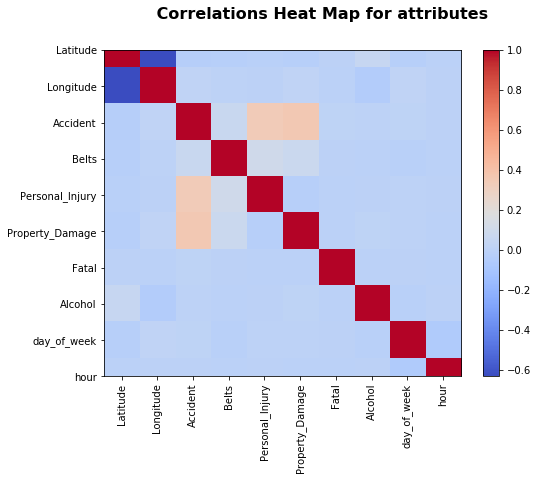

## Results & Conclusion

Proposed an approach of understanding, analyzing, and extracting useful information out of the huge dataset on traffic violations made in a state of Maryland during certain time period.

The findings made out of this project could be used for long term. Future enhancements can be made on the project to make
in more useful for the drivers.


 1. Predictor variable (train) for all regressions : ['Description', 'Latitude', 'Longitude', 'Belts', 'Personal_Injury',
       'Property_Damage', 'Fatal', 'Alcohol', 'Work_Zone', 'Race', 'Gender',
       'day_of_week', 'hour']
 2. Target variable (test) : ['Accident']

- **KNN Classifier Accuracy Score - 96.5%**
- **Random Forest Model Accuracy Score - 26.8%**
- **Logistic regression Accuracy Score - 96.8%**

From the above acuuracy score we can see that KNN Classifier Model is best model as it gives good accuracy score comparing to other models.

- **KNN Classifier Accuracy Score for location prediction - 66.2%**

**Metrics**:
- Mean square error for Logistic: 0.035210850668747816
- Mean square error for KNN: 0.03153475604833284

## PREDICTION: 
1. Predicting a comprehensive understanding of the reasons of violations so as to determine the underlying if it is contributing to an accident.
2. Predicting accident locations to find out the maximum issue prone sites in Maryland with the traffic violations dataset. This helps to warn drivers.

**Strengths**:
- The statistics can be used to educate vehicle drivers in Maryland to help them reduce future accidents by leveraging this data in driving test manuals.
- It gives an insight of future preventions by getting awareness about the related statistics.

**References**

[1] Peden, M, R. Scurfield, D. Sleet, D. Mohan, A.A.Hyder and E. Jarwan et al (Eds): 2004, “World report on road traffic injury prevention summary” World Health Organization. Geneva, Switzerland. Available at:
http://www.who.int/violence_injury_prevention/publications/road_traffic/world_report/summary_en_rev.pdf

[2] http://www.nhtsa.gov/

[3] http://en.wikipedia.org/wiki/Traffic_stop

[4] https://www.geeksforgeeks.org/generating-word-cloud-python/

[5] https://plot.ly/python/

[6] https://matplotlib.org/